In [1]:
import pandas as pd
import ast
import csv
import re
import numpy as np
from pathlib import Path
from functools import reduce
from datetime import timedelta, date
import datetime
import calendar

import math as m
import datetime as dt
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set_palette('ocean')
import nltk

%matplotlib inline


### Загружаем, очищаем, исследуем данные



In [2]:
movies_df = pd.read_csv("./movies_metadata.csv", low_memory=False)

In [3]:
movies_df.shape

(45466, 24)

In [4]:
movies_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
movies_df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
# Примечание: original_title - это неанглоязычное название иностранных фильмов, сохраняющее название вместо
movies_df.drop(columns=['adult', 'homepage', 'original_title', 'overview', 'poster_path', 'tagline', 'video'], inplace=True)
movies_df.head()

,belongs_to_collection,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0


In [8]:
print('Количество дубликатов: ', movies_df.duplicated(subset='id').sum())

Количество дубликатов:  30


In [9]:
movies_df.drop_duplicates(subset='id', inplace=True)

небольшая очистка

In [10]:
# Удалить tt из начала imdb_id
movies_df['imdb_id'] = movies_df['imdb_id'].str[2:]

# Убедитесь, что значения не перепутаны пробелами
# movies_df['id'].str.strip() 
movies_df['imdb_id'].str.strip()

# Переименуем 'belongs_to_collection column' и преобразовать в 0 (не часть ряда) или 1 (часть ряда)
movies_df.rename(columns={'belongs_to_collection': 'series'}, inplace=True)
movies_df['series'].fillna(0, inplace=True)
movies_df['series'].loc[(movies_df['series']) != 0] = 1 
movies_df.head()

C:\Users\arina\AppData\Local\Temp\ipykernel_9676\3183069680.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['series'].loc[(movies_df['series']) != 0] = 1


,series,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0
1,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0
2,1,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,6.5,92.0
3,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,6.1,34.0
4,1,0,"[{'id': 35, 'name': 'Comedy'}]",11862,0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,5.7,173.0


In [11]:
movies_df.isnull().sum(axis=0)

series                    0
budget                    0
genres                    0
id                        0
imdb_id                  17
original_language        11
popularity                5
production_companies      3
production_countries      3
release_date             87
revenue                   6
runtime                 263
spoken_languages          6
status                   87
title                     6
vote_average              6
vote_count                6
dtype: int64

In [12]:
#Рассчиваем процент пустых значений 
print('Процент пустых значений : ',(movies_df[movies_df.isnull().any(axis=1)].shape[0]/movies_df.shape[0])*100)

Процент пустых значений :  0.9573906153710714


In [13]:
# Удаление записей с пропущенными значениями составляет менее 1% данных
movies_df.dropna(how='any', inplace=True)

In [14]:
movies_df['series'] = movies_df['series'].astype('int64')
movies_df['budget'] = movies_df['budget'].astype('float64')
movies_df['imdb_id'] = movies_df['imdb_id'].astype('int64')


In [15]:
# Преобразовать поле даты в формат даты
movies_df['release_date_2']= pd.to_datetime(movies_df['release_date'])

In [16]:
movies_df.drop(columns=["release_date"], axis=1, inplace=True)
movies_df.rename(columns={"release_date_2": "release_date"}, inplace=True)

In [17]:
movies_df['release_month'] = pd.DatetimeIndex(movies_df['release_date']).month
movies_df['release_day'] = pd.DatetimeIndex(movies_df['release_date']).day
movies_df['release_year'] = pd.DatetimeIndex(movies_df['release_date']).year

In [18]:
movies_df.describe()

,series,budget,imdb_id,revenue,runtime,vote_average,vote_count,release_month,release_day,release_year
count,45001.000000,4.500100e+04,4.500100e+04,4.500100e+04,45001.000000,45001.000000,45001.000000,45001.000000,45001.000000,45001.000000
mean,0.099420,4.264486e+06,9.886290e+05,1.131969e+07,94.233884,5.638121,110.954757,6.461323,14.211618,1991.843870
std,0.299228,1.750660e+07,1.358373e+06,6.464880e+07,38.310975,1.895885,493.691367,3.625462,9.278611,24.076063
min,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1874.000000
25%,0.000000,0.000000e+00,8.272900e+04,0.000000e+00,85.000000,5.000000,3.000000,3.000000,6.000000,1978.000000
50%,0.000000,0.000000e+00,2.819190e+05,0.000000e+00,95.000000,6.000000,10.000000,7.000000,14.000000,2001.000000
75%,0.000000,0.000000e+00,1.533085e+06,0.000000e+00,107.000000,6.800000,35.000000,10.000000,22.000000,2010.000000
max,1.000000,3.800000e+08,7.158814e+06,2.787965e+09,1256.000000,10.000000,14075.000000,12.000000,31.000000,2020.000000


In [19]:
# Сократите набор данных до релевантных наблюдений - нужны только фильмы, в которых:
# статус = выпущен (исключаются фильмы, которые были отменены, все еще находятся в производстве, постпродакшн, планируются или ходят слухи)
movies_df = movies_df.loc[(movies_df['status']) == 'Released']
print(movies_df.shape)

#дата релиза > 1/1/1997 (исключаются все фильмы, снятые до 20 лет назад)
movies_df = movies_df.loc[(movies_df['release_year']) >= 1997]
print(movies_df.shape)

(44647, 20)
(25623, 20)


In [20]:
# Осталось 25 626 наблюдений. Теперь интересно узнать, сколько из нашего бюджета, доходов, популярности и vote_average отличны от нуля.

print('ненулевой бюджет:', (movies_df[movies_df['budget'] != 0].shape), (movies_df[movies_df['budget'] != 0].shape)[0]/movies_df.shape[0]*100,'%')
print('ненулевая популярность:', (movies_df[movies_df['popularity'] != 0].shape), (movies_df[movies_df['popularity'] != 0].shape)[0]/movies_df.shape[0]*100,'%')
print('ненулевой доход:', (movies_df[movies_df['revenue'] != 0].shape), (movies_df[movies_df['revenue'] != 0].shape)[0]/movies_df.shape[0]*100,'%')
print('ненулевое среднее число голосов:', (movies_df[movies_df['vote_average'] != 0].shape), (movies_df[movies_df['vote_average'] != 0].shape)[0]/movies_df.shape[0]*100,'%')

ненулевой бюджет: (6325, 20) 24.68485345197674 %
ненулевая популярность: (25623, 20) 100.0 %
ненулевой доход: (4985, 20) 19.455176989423563 %
ненулевое среднее число голосов: (24307, 20) 94.86398938453733 %


Только 25% наших наблюдений имеют ненулевой бюджет, и только 19% наших наблюдений имеют ненулевой доход. 100% наших наблюдений имеют оценку популярности, а 95% - среднее значение голосов, поэтому мы будем использовать популярность и / или среднее значение голосов в качестве нашей целевой переменной.

In [21]:
# Замените значения 0 для бюджета и доходов на NaN
movies_df['budget'] = movies_df['budget'].replace(0, np.nan)
movies_df['revenue'] = movies_df['revenue'].replace(0, np.nan)

In [22]:
# Фильтровать фильмы по странам производства (только в США)
movies_df = movies_df.loc[(movies_df['production_countries'].str.contains('United States of America', case=False))]
print(movies_df.shape)

(10809, 20)


In [23]:
# Рассчитайте столбец "Оценка" на основе формулы IMDB

m = movies_df['vote_count'].quantile(0.9)
C = movies_df['vote_average'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C) 

In [24]:
movies_df['score'] = movies_df.apply(weighted_rating, axis=1)

In [25]:
movies_df.drop(["vote_count", "vote_average"], axis=1, inplace=True)

Добавляйте рейтинги к фильмам df.

Примечание:

movies_df['id'] = credits_df['id'] = keywords_df['id'] = links_df['tmdbId']

рейтинг_df['MovieID'] = links_df['MovieID']

movies_df['imdb_id'] = links_df['imdbId']

In [26]:
links = pd.read_csv('./links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [27]:
links.isnull().sum(axis=0)

movieId      0
imdbId       0
tmdbId     219
dtype: int64

In [28]:
links['tmdbId'] = links['tmdbId'].astype('int', errors='ignore')

In [29]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [30]:
movies_df['id'] = movies_df['id'].astype('Int64')


In [31]:
links['tmdbId'] = links['tmdbId'].fillna(-1).astype('Int64')


In [32]:
movies2 = movies_df.merge(links, how='left', left_on='id', right_on='tmdbId')
movies2.head()

,series,budget,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,revenue,...,status,title,release_date,release_month,release_day,release_year,score,movieId,imdbId,tmdbId
0,0,1000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,118523,en,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,...,Released,Til There Was You,1997-05-30,5,30,1997,5.656348,779,118523,32872
1,0,53000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,119214,en,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,...,Released,Gone Fishin',1997-05-30,5,30,1997,5.610629,870,119214,9054
2,0,60000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",11015,120004,en,7.699967,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",33956608.0,...,Released,The Relic,1997-01-10,1,10,1997,5.683911,879,120004,11015
3,0,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",56077,120271,en,0.978989,"[{'name': 'Kanzaman', 'id': 4169}, {'name': 'K...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,...,Released,Talk of Angels,1998-10-30,10,30,1998,5.670733,887,120271,56077
4,0,NaN,"[{'id': 18, 'name': 'Drama'}]",52855,118927,en,1.463219,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",3028094.0,...,Released,Dangerous Ground,1997-02-12,2,12,1997,5.658537,981,118927,52855


In [33]:
movies2.duplicated(subset='id').sum()

8

In [34]:
movies2.drop_duplicates(subset='id', inplace=True)
movies2.shape

(10809, 22)

In [35]:
ratings = pd.read_csv('./ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [36]:
ratings.isnull().sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [37]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [38]:
avgratings = ratings.groupby('movieId').agg({'rating': 'mean'}).reset_index()
avgratings.head()

,movieId,rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565


In [39]:
movies3 = movies2.merge(avgratings, how='left', left_on='movieId', right_on='movieId')

In [40]:
movies3.drop(columns=['original_language', 'production_countries', 'imdbId', 'tmdbId'], inplace=True)

In [41]:
movies3["genres"] = movies3["genres"].apply(ast.literal_eval)
movies3["production_companies"] = movies3["production_companies"].apply(ast.literal_eval)
movies3['spoken_languages'] = movies3["spoken_languages"].apply(ast.literal_eval)

In [42]:
movies3["genres_list"] = movies3["genres"].apply(lambda x: [x[i]['name'] for i in range(len(x))])
s = movies3['genres_list']
i = np.arange(len(movies3)).repeat(s.str.len())
df_genre = movies3.iloc[i, :-1].assign(**{'genres_list': np.concatenate(s.values)})[["id", "genres_list"]]
df_genre.head()

,id,genres_list
0,32872,Comedy
0,32872,Romance
1,9054,Comedy
1,9054,Family
2,11015,Horror


In [43]:
df_genre.genres_list.value_counts().sort_values(ascending=False)

Drama              4282
Comedy             3520
Thriller           2568
Action             1885
Romance            1525
Horror             1487
Documentary        1294
Crime              1049
Adventure          1048
Family             1020
Science Fiction     972
Mystery             687
Fantasy             659
Animation           616
Music               365
TV Movie            305
History             245
War                 165
Western             105
Foreign              52
Name: genres_list, dtype: int64

In [44]:
set_val = set(df_genre["genres_list"].values)
for i in set_val:    
    df_genre["genre_"+i] = np.where(df_genre["genres_list"] == i,1,0)
df_genre = df_genre.groupby("id").max()
df_genre.head()

,genres_list,genre_TV Movie,genre_Horror,genre_Mystery,genre_Foreign,genre_Drama,genre_Music,genre_Western,genre_Animation,genre_Adventure,...,genre_War,genre_History,genre_Thriller,genre_Fantasy,genre_Documentary,genre_Romance,genre_Family,genre_Science Fiction,genre_Action,genre_Crime
id,,,,,,,,,,,,,,,,,,,,,
12,Family,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
14,Drama,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,Music,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,Fantasy,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
24,Crime,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [45]:
movies4 = pd.merge(movies3, df_genre, how='left', on='id')

In [46]:
movies4.drop(columns=["genres_list_x","genres_list_y"], axis=1, inplace=True)

In [47]:
movies4.dropna(subset=["genre_Fantasy"], inplace=True)

In [48]:
movies4["studio"] = movies4["production_companies"].apply(lambda x: [x[i]['name'] for i in range(len(x))])
s = movies4['studio']
i = np.arange(len(movies4)).repeat(s.str.len())
df_prod = movies4.iloc[i, :-1].assign(**{'studio': np.concatenate(s.values)})[["id", "studio"]]
df_prod['freq_studio'] = df_prod['studio'].map(df_prod['studio'].value_counts())

In [49]:
df_prod.sort_values(['id','freq_studio'], ascending=[True, False], inplace=True)
df_prod.drop_duplicates(subset='id', keep='first', inplace=True)

In [50]:
df_prod.head()

,id,studio,freq_studio
1373,12,Pixar Animation Studios,43
532,14,DreamWorks SKG,90
778,16,Canal+,33
1396,22,Walt Disney Pictures,177
1467,24,Miramax Films,101


In [51]:
movies5 = pd.merge(movies4, df_prod, how='left', on='id')
movies5.head()

,series,budget,genres,id,imdb_id,popularity,production_companies,revenue,runtime,spoken_languages,...,genre_Fantasy,genre_Documentary,genre_Romance,genre_Family,genre_Science Fiction,genre_Action,genre_Crime,studio_x,studio_y,freq_studio
0,0,1000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,118523,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",NaN,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[Paramount Pictures, Lakeshore Entertainment]",Paramount Pictures,227.0
1,0,53000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,119214,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...",NaN,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"[Caravan Pictures, Hollywood Pictures, Roger B...",Hollywood Pictures,20.0
2,0,60000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",11015,120004,7.699967,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",33956608.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[Paramount Pictures, Universal Pictures, Toho-...",Universal Pictures,301.0
3,0,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",56077,120271,0.978989,"[{'name': 'Kanzaman', 'id': 4169}, {'name': 'K...",NaN,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[Kanzaman, Kan Zamia-a, Polaris Pictures]",Kanzaman,8.0
4,0,NaN,"[{'id': 18, 'name': 'Drama'}]",52855,118927,1.463219,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",3028094.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[New Line Cinema, Jacaranda Films, Investec Me...",New Line Cinema,176.0


In [52]:
movies5.drop(columns=["studio_x"], axis=1, inplace=True)

In [53]:
movies5.dropna(subset=["studio_y"], inplace=True)

In [54]:
movies5["spoken_languages_list"] = movies5["spoken_languages"].apply(lambda x: [x[i]['name'] for i in range(len(x))])
s = movies5['spoken_languages_list']
i = np.arange(len(movies5)).repeat(s.str.len())
df_lang = movies5.iloc[i, :-1].assign(**{'spoken_languages_list': np.concatenate(s.values)})[["id", "spoken_languages_list"]]


In [55]:
df_lang.spoken_languages_list.value_counts().sort_values(ascending=False).nlargest(10)

English      8758
Français      496
Español       474
Deutsch       344
Pусский       217
Italiano      203
日本語           114
Português      96
普通话            94
Polski         92
Name: spoken_languages_list, dtype: int64

проводим серию манипуляций с данными фильмов и рейтингами, включающих группировку, присоединение, преобразование и удаление столбцов, а также применение литеральной оценки для преобразования строковых значений в списки. В конце кода создаются новые столбцы на основе значений в других столбцах, затем объединяются различные таблицы данных с помощью функции merge, а также производятся некоторые вычисления и фильтрация строк с пропущенными значениями

In [56]:
# Глядя на распределение разговорных языков, мы можем создать две категории - английский и другие
df_lang["spoken_languages_list_2"] = df_lang["spoken_languages_list"].apply(lambda x: "Other" if x not in ["English"] else x)

In [57]:
#Берем базу данных производственных компаний и создаем манекены

set_val = set(df_lang["spoken_languages_list_2"].values)
for i in set_val:    
    df_lang["spoken_lang_"+i] = np.where(df_lang["spoken_languages_list_2"] == i,1,0)
df_lang = df_lang.groupby("id").max()
df_lang.head()

,spoken_languages_list,spoken_languages_list_2,spoken_lang_English,spoken_lang_Other
id,,,,
12,English,English,1,0
14,English,English,1,0
16,English,English,1,0
22,English,English,1,0
24,日本語,Other,1,1


In [58]:
movies6 = pd.merge(movies5, df_lang, how='left', on='id')
movies6.head()

,series,budget,genres,id,imdb_id,popularity,production_companies,revenue,runtime,spoken_languages,...,genre_Science Fiction,genre_Action,genre_Crime,studio_y,freq_studio,spoken_languages_list_x,spoken_languages_list_y,spoken_languages_list_2,spoken_lang_English,spoken_lang_Other
0,0,1000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",32872,118523,2.700061,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",NaN,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0.0,0.0,0.0,Paramount Pictures,227.0,"[English, Français]",Français,Other,1.0,1.0
1,0,53000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",9054,119214,2.289647,"[{'name': 'Caravan Pictures', 'id': 175}, {'na...",NaN,94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0.0,0.0,0.0,Hollywood Pictures,20.0,[English],English,English,1.0,0.0
2,0,60000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",11015,120004,7.699967,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",33956608.0,110.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0.0,0.0,0.0,Universal Pictures,301.0,[English],English,English,1.0,0.0
3,0,NaN,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",56077,120271,0.978989,"[{'name': 'Kanzaman', 'id': 4169}, {'name': 'K...",NaN,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0.0,0.0,0.0,Kanzaman,8.0,[English],English,English,1.0,0.0
4,0,NaN,"[{'id': 18, 'name': 'Drama'}]",52855,118927,1.463219,"[{'name': 'New Line Cinema', 'id': 12}, {'name...",3028094.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0.0,0.0,0.0,New Line Cinema,176.0,"[English, Polski]",Polski,Other,1.0,1.0


In [59]:
movies6.drop(columns=["spoken_languages_list_x","spoken_languages_list_y","spoken_languages_list_2"], axis=1, inplace=True)

In [60]:
movies6.dropna(subset=["spoken_lang_English"], inplace=True)

In [61]:
movies6.drop(columns=['genres', 'production_companies','spoken_languages'], inplace=True)
movies6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 9030
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   series                 8887 non-null   int64         
 1   budget                 3960 non-null   float64       
 2   id                     8887 non-null   Int64         
 3   imdb_id                8887 non-null   int64         
 4   popularity             8887 non-null   object        
 5   revenue                3447 non-null   float64       
 6   runtime                8887 non-null   float64       
 7   status                 8887 non-null   object        
 8   title                  8887 non-null   object        
 9   release_date           8887 non-null   datetime64[ns]
 10  release_month          8887 non-null   int64         
 11  release_day            8887 non-null   int64         
 12  release_year           8887 non-null   int64         
 13  sco

In [62]:
credits = pd.read_csv('./credits.csv')

In [63]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


Примечание: Пол указан цифрами 1=Женщина 2=Мужчина 0=неизвестно/отсутствует

Порядок обозначается 0=Ведущий, 1=Поддерживающий и т.д.

In [64]:
# Создайте таблицы фильмов со всеми связанными актерами и членами съемочной группы в отдельных кадрах данных

all_casts = []
all_crews = []

for i in range(credits.shape[0]):
    cast = eval(credits['cast'][i])
    for x in cast:
        x['id'] = credits['id'][i]
    crew = eval(credits['crew'][i])
    for x in crew:
        x['id'] = credits['id'][i]
    all_casts.extend(cast)
    all_crews.extend(crew)

cast = pd.DataFrame(all_casts)
crew = pd.DataFrame(all_crews)

In [65]:
cast.gender.value_counts()

2    226713
0    223964
1    111797
Name: gender, dtype: int64

In [66]:
crew.gender.value_counts()

0    272319
2    160872
1     31123
Name: gender, dtype: int64

In [67]:
cast.head()

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,862,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,862,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,862,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,862,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,862,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg


In [68]:
cast.drop(columns=['cast_id', 'character', 'credit_id', 'profile_path'], inplace=True)
cast.head()

,gender,id,name,order
0,2,862,Tom Hanks,0
1,2,862,Tim Allen,1
2,2,862,Don Rickles,2
3,2,862,Jim Varney,3
4,2,862,Wallace Shawn,4


In [69]:
cast.name.value_counts().nlargest(35)

Bess Flowers          241
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     123
Michael Caine         110
Gérard Depardieu      110
John Carradine        109
Donald Sutherland     109
Jackie Chan           108
Frank Welker          107
Robert De Niro        104
Danny Trejo           102
Steve Buscemi         101
Irving Bacon           98
John Goodman           97
Danny Glover           96
Christopher Walken     96
Dennis Hopper          94
Susan Sarandon         93
John Hurt              93
Eric Roberts           92
Harvey Keitel          91
Bruce Willis           91
Malcolm McDowell       90
Willem Dafoe           89
Anthony Quinn          88
Donald Pleasence       87
Keith David            87
Stellan Skarsgård      86
Whoopi Goldberg        85
Morgan Freeman         85
Robert Duvall          84
Max von Sydow          84
Charles Lane           84
James Franco           83
Name: name, dtype: int64

In [70]:
# Слишком много вариантов приведения актеров. Удержание только людей с должностными функциями ведущего (0) или поддерживающего (1)
lead = cast[cast['order'] == 0]
lead = lead.rename(columns={'name':'lead','gender':'gender_lead'})
lead.drop(columns=['order'], inplace=True)
lead['freq_lead'] = lead['lead'].map(lead['lead'].value_counts())
lead.head()

,gender_lead,id,lead,freq_lead
0,2,862,Tom Hanks,41
13,2,8844,Robin Williams,42
39,2,15602,Walter Matthau,24
46,1,31357,Whitney Houston,3
56,2,11862,Steve Martin,30


In [71]:
print(lead.shape)
print(lead.duplicated().sum())

(36747, 4)
35


In [72]:
lead.drop_duplicates(inplace=True)
lead.shape

(36712, 4)

In [73]:
lead.lead.value_counts()

John Wayne          92
Jackie Chan         71
Nicolas Cage        55
Robert De Niro      53
Gérard Depardieu    50
                    ..
Madeleine Renaud     1
Lady Tabares         1
Gavin MacLeod        1
Jesse McCartney      1
Erika Eleniak        1
Name: lead, Length: 15049, dtype: int64

In [74]:
lead.gender_lead.value_counts()

2    21300
1     8381
0     7031
Name: gender_lead, dtype: int64

In [75]:
movies7 = pd.merge(movies6, lead, how='left', on='id')
movies7.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,genre_Science Fiction,genre_Action,genre_Crime,studio_y,freq_studio,spoken_lang_English,spoken_lang_Other,gender_lead,lead,freq_lead
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,0.0,0.0,0.0,Paramount Pictures,227.0,1.0,1.0,1.0,Sarah Jessica Parker,9.0
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,0.0,0.0,0.0,Hollywood Pictures,20.0,1.0,0.0,2.0,Joe Pesci,7.0
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,0.0,0.0,0.0,Universal Pictures,301.0,1.0,0.0,1.0,Penelope Ann Miller,3.0
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,0.0,0.0,0.0,Kanzaman,8.0,1.0,0.0,1.0,Polly Walker,1.0
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,0.0,0.0,0.0,New Line Cinema,176.0,1.0,1.0,2.0,Ice Cube,16.0


In [76]:
support = cast[cast['order'] == 1]
support = support.rename(columns={'name':'support','gender':'gender_support'})
support.drop(columns=['order'], inplace=True)
support['freq_support'] = support['support'].map(support['support'].value_counts())
support.head()

,gender_support,id,support,freq_support
1,2,862,Tim Allen,9
14,2,8844,Jonathan Hyde,1
40,2,15602,Jack Lemmon,10
47,1,31357,Angela Bassett,10
57,1,11862,Diane Keaton,25


In [77]:
print(support.shape)
print(support.duplicated().sum())

(41589, 4)
38


In [78]:
support.drop_duplicates(inplace=True)
support.shape

(41551, 4)

In [79]:
support.support.value_counts()

Barbara Hale         34
Oliver Hardy         29
Lou Costello         26
Eric Roberts         25
Diane Keaton         25
                     ..
Caitlin Martin        1
Idina Menzel          1
David Grisman         1
Sally Stockwell       1
Nathalie Lissenko     1
Name: support, Length: 22008, dtype: int64

In [80]:
support.gender_support.value_counts()

2    17929
1    13050
0    10572
Name: gender_support, dtype: int64

In [81]:
movies8 = pd.merge(movies7, support, how='left', on='id')
movies8.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,studio_y,freq_studio,spoken_lang_English,spoken_lang_Other,gender_lead,lead,freq_lead,gender_support,support,freq_support
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,Paramount Pictures,227.0,1.0,1.0,1.0,Sarah Jessica Parker,9.0,1.0,Jeanne Tripplehorn,2.0
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,Hollywood Pictures,20.0,1.0,0.0,2.0,Joe Pesci,7.0,2.0,Danny Glover,20.0
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,Universal Pictures,301.0,1.0,0.0,1.0,Penelope Ann Miller,3.0,2.0,Tom Sizemore,8.0
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,Kanzaman,8.0,1.0,0.0,1.0,Polly Walker,1.0,1.0,Frances McDormand,10.0
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,New Line Cinema,176.0,1.0,1.0,2.0,Ice Cube,16.0,1.0,Elizabeth Hurley,8.0


In [82]:
movies8.drop_duplicates(subset=["id"],inplace=True)
movies8.shape

(8887, 46)

In [83]:
crew.drop(columns=['credit_id', 'department', 'profile_path'], inplace=True)
crew.head()

,gender,id,job,name
0,2,862,Director,John Lasseter
1,2,862,Screenplay,Joss Whedon
2,2,862,Screenplay,Andrew Stanton
3,2,862,Screenplay,Joel Cohen
4,0,862,Screenplay,Alec Sokolow


In [84]:
crew['job'].unique()

array(['Director', 'Screenplay', 'Producer', 'Executive Producer',
       'Editor', 'Art Direction', 'Foley Editor', 'Animation',
       'ADR Editor', 'Orchestrator', 'Color Timer', 'CG Painter',
       'Original Story', 'Post Production Supervisor', 'Sculptor',
       'Animation Director', 'Music', 'Layout', 'Music Editor',
       'Negative Cutter', 'Title Designer',
       'Supervising Technical Director', 'Songs', 'Supervising Animator',
       'Sound Designer', 'Production Supervisor',
       'Executive Music Producer', 'Visual Effects Supervisor',
       'Visual Effects', 'Lighting Supervisor', 'Character Designer',
       'Set Dresser', 'Editorial Manager', 'Assistant Editor',
       'Editorial Coordinator', 'Production Coordinator',
       'Unit Publicist', 'Sound Re-Recording Mixer',
       'Supervising Sound Editor', 'Sound Effects Editor',
       'Sound Design Assistant', 'Assistant Sound Editor',
       'Casting Consultant', 'ADR Voice Casting',
       'Original Music Compos

In [85]:
# Слишком много вариантов экипажа. На данный момент мы оставляем за собой только людей с должностями режиссера, исполнительного продюсера, продюсерши или сценариста
director = crew[crew['job'] == 'Director']
director = director.rename(columns={'name':'director','gender':'gender_director'})
director.drop(columns=['job'], inplace=True)
director['freq_dir'] = director['director'].map(director['director'].value_counts())
director.head()

,gender_director,id,director,freq_dir
0,2,862,John Lasseter,10
109,2,8844,Joe Johnston,10
122,2,15602,Howard Deutch,11
126,2,31357,Forest Whitaker,4
141,2,11862,Charles Shyer,7


In [86]:
print(director.shape)
print(director.duplicated().sum())

(49048, 4)
50


In [87]:
director.drop_duplicates(inplace=True)

In [88]:
director.director.value_counts()

John Ford            68
Michael Curtiz       65
Werner Herzog        55
Alfred Hitchcock     53
Georges Méliès       51
                     ..
Jorge Dorado          1
Michael Rosenbaum     1
Lawrie Brewster       1
Connie Stevens        1
Daisy Asquith         1
Name: director, Length: 19740, dtype: int64

In [89]:
director.gender_director.value_counts()

2    27553
0    19551
1     1894
Name: gender_director, dtype: int64

In [90]:
director.sort_values(['id','freq_dir'], ascending=[True, False], inplace=True)
director.drop_duplicates(subset='id', keep='first', inplace=True)

In [91]:
director.shape

(44545, 4)

In [92]:
movies9 = pd.merge(movies8, director, how='left', on='id')
movies9.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,spoken_lang_Other,gender_lead,lead,freq_lead,gender_support,support,freq_support,gender_director,director,freq_dir
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,1.0,1.0,Sarah Jessica Parker,9.0,1.0,Jeanne Tripplehorn,2.0,2.0,Scott Winant,1.0
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,0.0,2.0,Joe Pesci,7.0,2.0,Danny Glover,20.0,2.0,Christopher Cain,11.0
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,0.0,1.0,Penelope Ann Miller,3.0,2.0,Tom Sizemore,8.0,2.0,Peter Hyams,18.0
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,0.0,1.0,Polly Walker,1.0,1.0,Frances McDormand,10.0,2.0,Nick Hamm,6.0
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,1.0,2.0,Ice Cube,16.0,1.0,Elizabeth Hurley,8.0,0.0,Darrell James Roodt,7.0


In [93]:
movies9.shape

(8887, 49)

In [94]:
ep = crew[crew['job'] == 'Executive Producer']
ep = ep.rename(columns={'name':'execprod','gender':'gender_ep'})
ep.drop(columns=['job'], inplace=True)
ep['freq_ep'] = ep['execprod'].map(ep['execprod'].value_counts())
ep.head()

,gender_ep,id,execprod,freq_ep
6,0,862,Ed Catmull,2
8,2,862,Steve Jobs,1
106,2,8844,Larry J. Franco,3
115,2,8844,Ted Field,22
116,2,8844,Robert W. Cort,12


In [95]:
print(ep.shape)
print(ep.duplicated().sum())

(18866, 4)
19


In [96]:
ep.drop_duplicates(inplace=True)

In [97]:
ep.execprod.value_counts()

Bob Weinstein           98
Harvey Weinstein        96
Hal B. Wallis           60
Roger Corman            58
Bruce Berman            57
                        ..
Jeff Katz                1
Jeff Kinney              1
Mads Peter Ole Olsen     1
Christine Alderson       1
Pirie Jones              1
Name: execprod, Length: 9939, dtype: int64

In [98]:
ep.gender_ep.value_counts()

2    8787
0    8698
1    1362
Name: gender_ep, dtype: int64

In [99]:
ep.shape

(18847, 4)

In [100]:
ep.sort_values(['id','freq_ep'], ascending=[True, False], inplace=True)
ep.drop_duplicates(subset='id', keep='first', inplace=True)
ep.shape

(8370, 4)

In [101]:
movies10 = pd.merge(movies9, ep, how='left', on='id')
movies10.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,freq_lead,gender_support,support,freq_support,gender_director,director,freq_dir,gender_ep,execprod,freq_ep
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,9.0,1.0,Jeanne Tripplehorn,2.0,2.0,Scott Winant,1.0,NaN,NaN,NaN
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,7.0,2.0,Danny Glover,20.0,2.0,Christopher Cain,11.0,NaN,NaN,NaN
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,3.0,2.0,Tom Sizemore,8.0,2.0,Peter Hyams,18.0,2.0,Mark Gordon,9.0
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,1.0,1.0,Frances McDormand,10.0,2.0,Nick Hamm,6.0,NaN,NaN,NaN
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,16.0,1.0,Elizabeth Hurley,8.0,0.0,Darrell James Roodt,7.0,NaN,NaN,NaN


In [102]:
movies10.shape

(8887, 52)

создаем наборы данных, объединяя данные о языках озвучки, жанрах и производственных компаниях для фильмов. Скрипт также разделяет актеров, режиссеров и других членов съемочной группы, записывая их имена, пол и название должности, среди прочей информации, в отдельные наборы данных. Код также используется для очистки данных, например, путем удаления дублирующихся записей или удаления столбцов, которые не нужны.

In [103]:
prod = crew[crew['job'] == 'Producer']
prod = prod.rename(columns={'name':'producer','gender':'gender_producer'})
prod.drop(columns=['job'], inplace=True)
prod['freq_producer'] = prod['producer'].map(prod['producer'].value_counts())
prod.head()

,gender_producer,id,producer,freq_producer
5,1,862,Bonnie Arnold,4
7,2,862,Ralph Guggenheim,1
114,2,8844,Scott Kroopf,17
119,2,8844,William Teitler,7
128,0,31357,Ronald Bass,4


In [104]:
print(prod.shape)
print(prod.duplicated().sum())

(43555, 4)
65


In [105]:
prod.drop_duplicates(inplace=True)

In [106]:
prod.producer.value_counts()

Darryl F. Zanuck    75
Walt Disney         73
Hal B. Wallis       70
Brian Grazer        67
Scott Rudin         62
                    ..
Oleg Kokhan          1
Elma Tataragić       1
William Girard       1
Philippe Caland      1
Hamid Nematollah     1
Name: producer, Length: 20017, dtype: int64

In [107]:
prod.gender_producer.value_counts()

2    20308
0    20219
1     2963
Name: gender_producer, dtype: int64

In [108]:
prod.sort_values(['id','freq_producer'], ascending=[True, False], inplace=True)
prod.drop_duplicates(subset='id', keep='first', inplace=True)

In [109]:
prod.shape

(21986, 4)

In [110]:
movies11 = pd.merge(movies10, prod, how='left', on='id')
movies11.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,freq_support,gender_director,director,freq_dir,gender_ep,execprod,freq_ep,gender_producer,producer,freq_producer
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,2.0,2.0,Scott Winant,1.0,NaN,NaN,NaN,1.0,Penney Finkelman Cox,4.0
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,20.0,2.0,Christopher Cain,11.0,NaN,NaN,NaN,2.0,Roger Birnbaum,36.0
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,8.0,2.0,Peter Hyams,18.0,2.0,Mark Gordon,9.0,1.0,Gale Anne Hurd,26.0
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,10.0,2.0,Nick Hamm,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,8.0,0.0,Darrell James Roodt,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
movies11.shape

(8887, 55)

In [112]:
scnply = crew[crew['job'] == 'Screenplay']
scnply = scnply.rename(columns={'name':'writer','gender':'gender_scnply'})
scnply.drop(columns=['job'], inplace=True)
scnply['freq_scnply'] = scnply['writer'].map(scnply['writer'].value_counts())
scnply.head()

,gender_scnply,id,writer,freq_scnply
1,2,862,Joss Whedon,7
2,2,862,Andrew Stanton,8
3,2,862,Joel Cohen,6
4,0,862,Alec Sokolow,6
107,2,8844,Jonathan Hensleigh,7


In [113]:
print(scnply.shape)
print(scnply.duplicated().sum())

(25163, 4)
20


In [114]:
scnply.drop_duplicates(inplace=True)

In [115]:
scnply.writer.value_counts()

Ben Hecht             35
Woody Allen           33
Ernesto Gastaldi      30
Dudley Nichols        29
Nunnally Johnson      29
                      ..
Ripley Highsmith       1
Matt Roe               1
Sarett Tobias          1
John Jacoby            1
Jeffrey Goldenberg     1
Name: writer, Length: 12817, dtype: int64

In [116]:
scnply.gender_scnply.value_counts()

2    12900
0    10910
1     1333
Name: gender_scnply, dtype: int64

In [117]:
scnply.shape

(25143, 4)

In [118]:
scnply.sort_values(['id','freq_scnply'], ascending=[True, False], inplace=True)
scnply.drop_duplicates(subset='id', keep='first', inplace=True)
scnply.shape

(15713, 4)

In [119]:
movies12 = pd.merge(movies11, scnply, how='left', on='id')
movies12.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,freq_dir,gender_ep,execprod,freq_ep,gender_producer,producer,freq_producer,gender_scnply,writer,freq_scnply
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,1.0,NaN,NaN,NaN,1.0,Penney Finkelman Cox,4.0,NaN,NaN,NaN
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,11.0,NaN,NaN,NaN,2.0,Roger Birnbaum,36.0,NaN,NaN,NaN
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,18.0,2.0,Mark Gordon,9.0,1.0,Gale Anne Hurd,26.0,1.0,Amy Holden Jones,5.0
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Frank McGuinness,2.0
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# Добавить ключевые слова

keywords = pd.read_csv('./keywords.csv')
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [121]:
print(keywords.shape)
print(keywords.duplicated().sum())

(46419, 2)
987


In [122]:
keywords.drop_duplicates(inplace=True)
keywords.shape

(45432, 2)

In [123]:
kwlist = []

for i in range(keywords.shape[0]):
    keyw = eval(keywords['keywords'].iloc[i])
    for each in keyw:
        each['id'] = keywords['id'].iloc[i]
    kwlist.extend(keyw)
k = pd.DataFrame(kwlist)

k = k.rename(columns={'name':'keyword'})

In [124]:
k = k.groupby('id')['keyword'].apply(', '.join).reset_index()
k.head()

,id,keyword
0,2,"underdog, prison, factory worker, prisoner, he..."
1,3,"salesclerk, helsinki, garbage, independent film"
2,5,"hotel, new year's eve, witch, bet, hotel room,..."
3,6,"chicago, drug dealer, boxing match, escape, on..."
4,11,"android, galaxy, hermit, death star, lightsabe..."


In [125]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arina\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

создаем набор фреймов данных, объединяя данные о языках озвучки, жанрах и производственных компаниях для фильмов. Скрипт также разделяет актеров, режиссеров и других членов экипажа, записывая их имена, пол и должности, среди прочей информации, в отдельные фреймы данных. Код также используется для очистки данных, например, удаления дублирующихся записей или отбрасывания ненужных столбцов.

In [126]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(tokenizer=word_tokenize,ngram_range=(1,2), binary=True, max_features=30,stop_words='english')
TFIDF=vect.fit_transform(k['keyword'])

C:\Users\arina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [127]:
movies13 = pd.merge(movies12, k, how='left', on='id')
movies13.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,gender_ep,execprod,freq_ep,gender_producer,producer,freq_producer,gender_scnply,writer,freq_scnply,keyword
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,NaN,NaN,NaN,1.0,Penney Finkelman Cox,4.0,NaN,NaN,NaN,"poem, father son relationship, support group, ..."
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,NaN,NaN,NaN,2.0,Roger Birnbaum,36.0,NaN,NaN,NaN,"sea, boat, fishing, rogue"
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,2.0,Mark Gordon,9.0,1.0,Gale Anne Hurd,26.0,1.0,Amy Holden Jones,5.0,"chicago, based on novel, monster, museum, pile..."
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Frank McGuinness,2.0,independent film
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,independent film


In [128]:
# Не хватает большого количества информации для исполнительных продюсеров, продюсерши и сценаристов (включая пол) - отбросьте эти категории

cols2drop = [49, 50, 51, 52, 53, 54, 55, 56, 57]
movies14 = movies13.iloc[:, [j for j, c in enumerate(movies13.columns) if j not in cols2drop]]

In [129]:
# Преобразовать столбец "пол" для остальных столбцов актеров /съемочной группы в IsFemale

movies14.rename(columns={'gender_lead': 'isFemale_lead', 'gender_support': 'isFemale_support', 'gender_director': 'isFemale_director'}, inplace=True)

# Замените значения 0 для гендера на NaN

movies14['isFemale_lead'] = movies14['isFemale_lead'].replace(0, np.nan)
movies14['isFemale_support'] = movies14['isFemale_support'].replace(0, np.nan)
movies14['isFemale_director'] = movies14['isFemale_director'].replace(0, np.nan)

# Замените 2 значения для гендера на 0

movies14['isFemale_lead'] = movies14['isFemale_lead'].replace(2, 0)
movies14['isFemale_support'] = movies14['isFemale_support'].replace(2, 0)
movies14['isFemale_director'] = movies14['isFemale_director'].replace(2, 0)

movies14.head()

C:\Users\arina\AppData\Local\Temp\ipykernel_9676\4290218953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies14.rename(columns={'gender_lead': 'isFemale_lead', 'gender_support': 'isFemale_support', 'gender_director': 'isFemale_director'}, inplace=True)
C:\Users\arina\AppData\Local\Temp\ipykernel_9676\4290218953.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies14['isFemale_lead'] = movies14['isFemale_lead'].replace(0, np.nan)
C:\Users\arina\AppData\Local\Temp\ipykernel_9676\4290218953.py:8: SettingWithCopyWarning: 
A value is trying to be set on 

,series,budget,id,imdb_id,popularity,revenue,runtime,status,title,release_date,...,isFemale_lead,lead,freq_lead,isFemale_support,support,freq_support,isFemale_director,director,freq_dir,keyword
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Released,Til There Was You,1997-05-30,...,1.0,Sarah Jessica Parker,9.0,1.0,Jeanne Tripplehorn,2.0,0.0,Scott Winant,1.0,"poem, father son relationship, support group, ..."
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Released,Gone Fishin',1997-05-30,...,0.0,Joe Pesci,7.0,0.0,Danny Glover,20.0,0.0,Christopher Cain,11.0,"sea, boat, fishing, rogue"
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,Released,The Relic,1997-01-10,...,1.0,Penelope Ann Miller,3.0,0.0,Tom Sizemore,8.0,0.0,Peter Hyams,18.0,"chicago, based on novel, monster, museum, pile..."
3,0,NaN,56077,120271,0.978989,NaN,96.0,Released,Talk of Angels,1998-10-30,...,1.0,Polly Walker,1.0,1.0,Frances McDormand,10.0,0.0,Nick Hamm,6.0,independent film
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Released,Dangerous Ground,1997-02-12,...,0.0,Ice Cube,16.0,1.0,Elizabeth Hurley,8.0,NaN,Darrell James Roodt,7.0,independent film


In [130]:
# Удаляем ненужные столбцы
movies14.drop(columns=['status', 'movieId'], inplace=True)
movies14.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 8886
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   series                 8887 non-null   int64         
 1   budget                 3960 non-null   float64       
 2   id                     8887 non-null   Int64         
 3   imdb_id                8887 non-null   int64         
 4   popularity             8887 non-null   object        
 5   revenue                3447 non-null   float64       
 6   runtime                8887 non-null   float64       
 7   title                  8887 non-null   object        
 8   release_date           8887 non-null   datetime64[ns]
 9   release_month          8887 non-null   int64         
 10  release_day            8887 non-null   int64         
 11  release_year           8887 non-null   int64         
 12  score                  8887 non-null   float64       
 13  rat

C:\Users\arina\AppData\Local\Temp\ipykernel_9676\1316751242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies14.drop(columns=['status', 'movieId'], inplace=True)


In [131]:
movies14.duplicated(subset='id').sum()

0

In [132]:
# Руководство, поддержка и директор Bucketize

movies14['leadAppearances'] = pd.cut(movies14['freq_lead'], bins=np.linspace(0,75,6))
movies14['supportAppearances'] = pd.cut(movies14['freq_support'], bins=np.linspace(0,25,6))
movies14['dirAppearances'] = pd.cut(movies14['freq_dir'], bins=np.linspace(0,55,5))
movies14['studioAppearances'] = pd.cut(movies14['freq_studio'], bins=np.linspace(0,304,7))

movies14.head()

C:\Users\arina\AppData\Local\Temp\ipykernel_9676\434446315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies14['leadAppearances'] = pd.cut(movies14['freq_lead'], bins=np.linspace(0,75,6))
C:\Users\arina\AppData\Local\Temp\ipykernel_9676\434446315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies14['supportAppearances'] = pd.cut(movies14['freq_support'], bins=np.linspace(0,25,6))
C:\Users\arina\AppData\Local\Temp\ipykernel_9676\434446315.py:5: SettingWithCopyWarning: 
A value is trying to b

,series,budget,id,imdb_id,popularity,revenue,runtime,title,release_date,release_month,...,support,freq_support,isFemale_director,director,freq_dir,keyword,leadAppearances,supportAppearances,dirAppearances,studioAppearances
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Til There Was You,1997-05-30,5,...,Jeanne Tripplehorn,2.0,0.0,Scott Winant,1.0,"poem, father son relationship, support group, ...","(0.0, 15.0]","(0.0, 5.0]","(0.0, 13.75]","(202.667, 253.333]"
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Gone Fishin',1997-05-30,5,...,Danny Glover,20.0,0.0,Christopher Cain,11.0,"sea, boat, fishing, rogue","(0.0, 15.0]","(15.0, 20.0]","(0.0, 13.75]","(0.0, 50.667]"
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,The Relic,1997-01-10,1,...,Tom Sizemore,8.0,0.0,Peter Hyams,18.0,"chicago, based on novel, monster, museum, pile...","(0.0, 15.0]","(5.0, 10.0]","(13.75, 27.5]","(253.333, 304.0]"
3,0,NaN,56077,120271,0.978989,NaN,96.0,Talk of Angels,1998-10-30,10,...,Frances McDormand,10.0,0.0,Nick Hamm,6.0,independent film,"(0.0, 15.0]","(5.0, 10.0]","(0.0, 13.75]","(0.0, 50.667]"
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Dangerous Ground,1997-02-12,2,...,Elizabeth Hurley,8.0,NaN,Darrell James Roodt,7.0,independent film,"(15.0, 30.0]","(5.0, 10.0]","(0.0, 13.75]","(152.0, 202.667]"


In [133]:
movies14['leadAppearances'].unique()

[(0.0, 15.0], (15.0, 30.0], NaN, (30.0, 45.0], (45.0, 60.0], (60.0, 75.0]]
Categories (5, interval[float64, right]): [(0.0, 15.0] < (15.0, 30.0] < (30.0, 45.0] < (45.0, 60.0] < (60.0, 75.0]]

In [134]:
movies14['supportAppearances'].unique()

[(0.0, 5.0], (15.0, 20.0], (5.0, 10.0], (10.0, 15.0], (20.0, 25.0], NaN]
Categories (5, interval[float64, right]): [(0.0, 5.0] < (5.0, 10.0] < (10.0, 15.0] < (15.0, 20.0] < (20.0, 25.0]]

In [135]:
movies14['dirAppearances'].unique()

[(0.0, 13.75], (13.75, 27.5], (27.5, 41.25], (41.25, 55.0], NaN]
Categories (4, interval[float64, right]): [(0.0, 13.75] < (13.75, 27.5] < (27.5, 41.25] < (41.25, 55.0]]

In [136]:
movies14['studioAppearances'].unique()

[(202.667, 253.333], (0.0, 50.667], (253.333, 304.0], (152.0, 202.667], (101.333, 152.0], (50.667, 101.333]]
Categories (6, interval[float64, right]): [(0.0, 50.667] < (50.667, 101.333] < (101.333, 152.0] < (152.0, 202.667] < (202.667, 253.333] < (253.333, 304.0]]

In [137]:
movies_final_w_dummies = pd.concat([movies14, pd.get_dummies(movies14['leadAppearances'])], axis=1).drop(['freq_lead'], axis=1)
col = movies_final_w_dummies.columns 
movies_final_w_dummies.rename(columns={col[51]:'lead_5Quintile', col[52]:'lead_4Quintile', col[53]:'lead_3Quintile', col[54]:'lead_2Quintile', col[55]:'lead_1Quintile'}, inplace=True)

In [138]:
movies_final_w_dummies = pd.concat([movies_final_w_dummies, pd.get_dummies(movies14['supportAppearances'])], axis=1).drop(['freq_support'], axis=1)
col = movies_final_w_dummies.columns
movies_final_w_dummies.rename(columns={col[55]:'support_5Quintile', col[56]:'support_4Quintile', col[57]:'support_3Quintile', col[58]:'support_2Quintile', col[59]:'support_1Quintile'}, inplace=True)

In [139]:
movies_final_w_dummies = pd.concat([movies_final_w_dummies, pd.get_dummies(movies14['dirAppearances'])], axis=1).drop(['freq_dir'], axis=1)
col = movies_final_w_dummies.columns
movies_final_w_dummies.rename(columns={col[59]:'dir_4Quartile', col[60]:'dir_3Quartile', col[61]:'dir_2Quartile', col[62]:'dir_1Quintile'}, inplace=True)

In [140]:
movies_final_w_dummies = pd.concat([movies_final_w_dummies, pd.get_dummies(movies14['studioAppearances'])], axis=1).drop(['freq_studio'], axis=1)
col = movies_final_w_dummies.columns
movies_final_w_dummies.rename(columns={col[62]:'studio_6Quartile', col[63]:'studio_5Quartile', col[64]:'studio_4Quartile', col[65]:'studio_3Quartile', col[66]:'studio_2Quartile', col[67]:'studio_1Quartile'}, inplace=True)

In [141]:
movies_final_w_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8887 entries, 0 to 8886
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   series                 8887 non-null   int64         
 1   budget                 3960 non-null   float64       
 2   id                     8887 non-null   Int64         
 3   imdb_id                8887 non-null   int64         
 4   popularity             8887 non-null   object        
 5   revenue                3447 non-null   float64       
 6   runtime                8887 non-null   float64       
 7   title                  8887 non-null   object        
 8   release_date           8887 non-null   datetime64[ns]
 9   release_month          8887 non-null   int64         
 10  release_day            8887 non-null   int64         
 11  release_year           8887 non-null   int64         
 12  score                  8887 non-null   float64       
 13  rat

In [142]:
movies_final_w_dummies.drop(columns=['dirAppearances','supportAppearances','leadAppearances','studioAppearances'], axis=1, inplace=True)

In [143]:
movies_final_w_dummies.shape

(8887, 64)

In [144]:
movies14.to_csv("./data_new.csv", index=False)
movies_final_w_dummies.to_csv("./data_w_dummies_final.csv", index=False)

код готовит и очищает набор данных, связанный с фильмами. Сначала он использует библиотеку NLTK для токенизации ключевых слов фильмов и библиотеку Scikit-learn для их преобразования с помощью алгоритма Term Frequency-Inverse Document Frequency (TF-IDF). Затем он объединяет полученный датафрейм с другим, используя общий идентификатор (id).

Далее код удаляет некоторые столбцы, связанные с исполнительными продюсерами, продюсерами и сценаристами. Он также переименовывает некоторые столбцы, связанные с полом актеров и режиссера. После этого он заменяет некоторые значения пола на NaN или 0 в зависимости от их исходных значений.

Затем код создает новые столбцы, категоризируя количество появлений главных актеров, актеров второго плана, режиссера и студии. После этого он создает фиктивные переменные для этих категориальных столбцов и удаляет исходные. Наконец, он удаляет еще несколько столбцов и проверяет информацию полученного датафрейма.

Примечание: после вывода файла "data_w_dummies_final.csv" в приведенном выше коде мы создали второй файл данных для тестирования наших моделей с помощью Excel/OpenRefine, чтобы быстро создать модифицированный набор данных, который преобразовал фиктивные переменные для квартилей director, lead, support и studio в порядковые функции. Это позволило нам сократить общее количество функций с 67 до 47. Этот второй метод также оказался более успешным с нашими моделями и представляет собой набор данных "data_w_dummies_final_2.csv", который мы загружаем в следующую ячейку.



# Описательный анализ



выполняем задачи по очистке и анализу данных на наборе данных о фильмах, включая выборку столбцов, группировку, создание новых DataFrame'ов, удаление дубликатов и преобразование типов данных. В конечном итоге данные готовятся для использования в модели машинного обучения.

In [145]:
movies_final = pd.read_csv("./data_w_dummies_final.csv")
movies_df = pd.read_csv("./movies_metadata.csv")

C:\Users\arina\AppData\Local\Temp\ipykernel_9676\2574695736.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("./movies_metadata.csv")


In [146]:
test = movies_final[['popularity','budget','revenue']]
test.dropna(inplace=True)

C:\Users\arina\AppData\Local\Temp\ipykernel_9676\1156816542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.dropna(inplace=True)


In [147]:
test['return'] = test['revenue']/test['budget']
test['popularity_bin'] = pd.cut(test['popularity'],bins=np.linspace(0,600,5))
test_2 = test[['popularity_bin','return']]
test.groupby('popularity_bin').median()

C:\Users\arina\AppData\Local\Temp\ipykernel_9676\2176947285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['return'] = test['revenue']/test['budget']
C:\Users\arina\AppData\Local\Temp\ipykernel_9676\2176947285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['popularity_bin'] = pd.cut(test['popularity'],bins=np.linspace(0,600,5))


,popularity,budget,revenue,return
popularity_bin,,,,
"(0.0, 150.0]",9.544657,30000000.0,5.693230e+07,1.955405
"(150.0, 300.0]",187.860492,149000000.0,7.831130e+08,6.054596
"(300.0, 450.0]",NaN,NaN,NaN,NaN
"(450.0, 600.0]",547.488298,74000000.0,1.156731e+09,15.631499


In [148]:
movies_df.duplicated(subset='id').sum()
movies_df.drop_duplicates(subset='id', inplace=True)
movies_df['imdb_id'] = movies_df['imdb_id'].str[2:]

# Убедитесь, что пробелы не портят значения
# movies_df['id'].str.strip()
movies_df['imdb_id'].str.strip()
movies_df_words = movies_df[['id','imdb_id','overview']]
movies_df_words.isna().sum()

id            0
imdb_id      17
overview    954
dtype: int64

In [149]:
movies_df_words.dropna(how='any', inplace=True)
movies_df_words['imdb_id'] = movies_df_words['imdb_id'].apply(pd.to_numeric, errors='coerce').astype('Int64')
movies_df_words.head()


C:\Users\arina\AppData\Local\Temp\ipykernel_9676\143201528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_words.dropna(how='any', inplace=True)
C:\Users\arina\AppData\Local\Temp\ipykernel_9676\143201528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_words['imdb_id'] = movies_df_words['imdb_id'].apply(pd.to_numeric, errors='coerce').astype('Int64')


,id,imdb_id,overview
0,862,114709,"Led by Woody, Andy's toys live happily in his ..."
1,8844,113497,When siblings Judy and Peter discover an encha...
2,15602,113228,A family wedding reignites the ancient feud be...
3,31357,114885,"Cheated on, mistreated and stepped on, the wom..."
4,11862,113041,Just when George Banks has recovered from his ...


In [150]:
movies_final.head()

,series,budget,id,imdb_id,popularity,revenue,runtime,title,release_date,release_month,...,dir_4Quartile,dir_3Quartile,dir_2Quartile,dir_1Quintile,studio_6Quartile,studio_5Quartile,studio_4Quartile,studio_3Quartile,studio_2Quartile,studio_1Quartile
0,0,1000000.0,32872,118523,2.700061,NaN,113.0,Til There Was You,1997-05-30,5,...,1,0,0,0,0,0,0,0,1,0
1,0,53000000.0,9054,119214,2.289647,NaN,94.0,Gone Fishin',1997-05-30,5,...,1,0,0,0,1,0,0,0,0,0
2,0,60000000.0,11015,120004,7.699967,33956608.0,110.0,The Relic,1997-01-10,1,...,0,1,0,0,0,0,0,0,0,1
3,0,NaN,56077,120271,0.978989,NaN,96.0,Talk of Angels,1998-10-30,10,...,1,0,0,0,1,0,0,0,0,0
4,0,NaN,52855,118927,1.463219,3028094.0,95.0,Dangerous Ground,1997-02-12,2,...,1,0,0,0,0,0,0,1,0,0


In [151]:
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   series                 8887 non-null   int64  
 1   budget                 3960 non-null   float64
 2   id                     8887 non-null   int64  
 3   imdb_id                8887 non-null   int64  
 4   popularity             8887 non-null   float64
 5   revenue                3447 non-null   float64
 6   runtime                8887 non-null   float64
 7   title                  8887 non-null   object 
 8   release_date           8887 non-null   object 
 9   release_month          8887 non-null   int64  
 10  release_day            8887 non-null   int64  
 11  release_year           8887 non-null   int64  
 12  score                  8887 non-null   float64
 13  rating                 8815 non-null   float64
 14  genre_TV Movie         8887 non-null   float64
 15  genr

In [152]:
movies_final['release_date']= pd.to_datetime(movies_final['release_date'])

# movies_final['release_date'] = movies_final['release_date'].apply(fix_date)
movies_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   series                 8887 non-null   int64         
 1   budget                 3960 non-null   float64       
 2   id                     8887 non-null   int64         
 3   imdb_id                8887 non-null   int64         
 4   popularity             8887 non-null   float64       
 5   revenue                3447 non-null   float64       
 6   runtime                8887 non-null   float64       
 7   title                  8887 non-null   object        
 8   release_date           8887 non-null   datetime64[ns]
 9   release_month          8887 non-null   int64         
 10  release_day            8887 non-null   int64         
 11  release_year           8887 non-null   int64         
 12  score                  8887 non-null   float64       
 13  rat

In [153]:
movies_final['imdb_id'] = movies_final['imdb_id'].astype(str)
movies_wordcloud = pd.concat([movies_final[['title','id','imdb_id','keyword']], movies_df_words], axis=1, join='inner')
movies_wordcloud.head()

,title,id,imdb_id,keyword,id,imdb_id,overview
0,Til There Was You,32872,118523,"poem, father son relationship, support group, ...",862,114709,"Led by Woody, Andy's toys live happily in his ..."
1,Gone Fishin',9054,119214,"sea, boat, fishing, rogue",8844,113497,When siblings Judy and Peter discover an encha...
2,The Relic,11015,120004,"chicago, based on novel, monster, museum, pile...",15602,113228,A family wedding reignites the ancient feud be...
3,Talk of Angels,56077,120271,independent film,31357,114885,"Cheated on, mistreated and stepped on, the wom..."
4,Dangerous Ground,52855,118927,independent film,11862,113041,Just when George Banks has recovered from his ...


In [154]:
movies_wordcloud.dropna(inplace=True)

In [155]:

# Преобразование в строку
movies_wordcloud['title']=movies_wordcloud['title'].astype('str')
movies_wordcloud['overview']=movies_wordcloud['overview'].astype('str')
movies_wordcloud['keyword']=movies_wordcloud['keyword'].astype('str')

# объединение заголовков через пробел
title_data=' '.join(movies_wordcloud['title'])
overview_data=' '.join(movies_wordcloud['overview'])
keyword_data=' '.join(movies_wordcloud['keyword'])

In [156]:
from wordcloud import WordCloud, STOPWORDS

In [157]:
title_cloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1000, width=3000).generate(title_data)
plt.figure(figsize=(12,6))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

In [158]:
overview_cloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1000, width=3000).generate(overview_data)
plt.figure(figsize=(12,6))
plt.imshow(overview_cloud)
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

In [ ]:
keyword_cloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=1000, width=3000).generate(keyword_data)
plt.figure(figsize=(12,6))
plt.imshow(keyword_cloud)
plt.axis('off')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
plt.figure(figsize=(20,10))

col = ['budget', 'popularity', 'revenue', 'runtime', 'score', 'rating']

a = 1
for i in range(len(col)):
    plt.subplot(2, 3, a); 
    sns.distplot(movies_final[col[i]])
    plt.xlabel(col[i])
    a += 1

plt.tight_layout()


In [ ]:
plt.figure(figsize=(20,5))

col = ['release_month','release_day', 'release_year']

a = 1
for i in range(len(col)):
    plt.subplot(1, 3, a); 
    countplt = sns.countplot(movies_final[col[i]])
    countplt.set_xticklabels(countplt.get_xticklabels(),rotation = 60)
    plt.xlabel(col[i])
    
    a += 1

plt.tight_layout()


In [ ]:
movies_2 = movies_final.drop(columns=["imdb_id","id"],axis=1)

In [ ]:
movies_2['popularity'].describe()

In [ ]:
# Винсоризация
# Замена чрезвычайно высоких значений популярности значением, немного превышающим максимальную популярность
movies_2['popularity_2'] = np.where(movies_2["popularity"]>=movies_2["popularity"].quantile(0.995), 50, movies_2["popularity"])
print(movies_2['popularity_2'].describe())
sns.distplot(movies_2['popularity_2'])
plt.xlabel('popularity')

In [ ]:
# Преобразование журнала
# Замена чрезвычайно высоких значений популярности значением, немного превышающим максимальную популярность
movies_2['popularity_3'] = np.log1p(movies_2['popularity'])
print(movies_2['popularity_3'].describe())
sns.distplot(movies_2['popularity_3'])
plt.xlabel('popularity')

In [ ]:
num_features = movies_2.select_dtypes(include=['float64','int64']).columns.values

# Вычислить корреляции между всеми числовыми признаками

corr = movies_2[num_features].corr()

In [ ]:
# Сортировка объектов по их (абсолютной) корреляции с целевой переменной.

pd.DataFrame(corr.sort_values(by='popularity_2', key=abs, ascending=False)[['popularity_2', 'popularity_3']]).head(30)

In [ ]:
# Отображение корреляций в виде тепловой карты
# Это может указывать на то, что мы можем отказаться от некоторых из этих функций.

fig, ax = plt.subplots(figsize=(27, 30))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = 'RdBu_r', xticklabels=True, yticklabels=True, cbar_kws={'label' : 'correlation'}, ax=ax)

In [ ]:
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack().reset_index()
corr_df[corr_df[0]>0.7]
# Бюджет и доходы имеют корреляцию в 74%
# Мы удалим популярность и будем использовать popularity_2 в качестве цели

In [159]:
plt.scatter(movies_2['budget'],movies_2['revenue'])

NameError: name 'movies_2' is not defined

NameError: name 'movies_2' is not defined

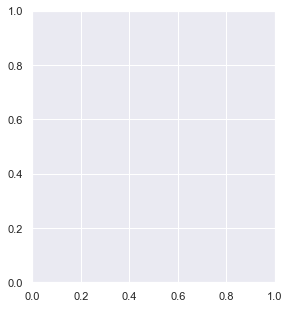

In [160]:
plt.figure(figsize=(20,5))

col = ['runtime', 'release_month', 'score', 'rating']

a = 1
for i in range(len(col)):
    plt.subplot(1, 4, a); 
    plt.scatter(movies_2[col[i]], movies_2['popularity_2'])
    plt.xlabel(col[i])
    plt.ylabel("Popularity")
    a += 1

plt.tight_layout()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=movies_2['score'], y=movies_2['rating'])

plt.xlabel('Score')
plt.ylabel('Rating')
plt.show()



# Прогностический анализ

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
# Создаем 'time_since_released' для лучшей интерпретируемости
movies_2["time_since_released"] = date.today().year - movies_2["release_year"]

NameError: name 'movies_2' is not defined

In [163]:
movies_2[["time_since_released","release_year","release_date"]]

NameError: name 'movies_2' is not defined

In [164]:
movies_na = pd.DataFrame(movies_2.isna().sum())
movies_na[movies_na[0]>0]

NameError: name 'movies_2' is not defined

In [165]:
# Для прогнозирования мы не будем использовать budget, revenue, isFemale_lead, isFemale_support, isFemale_director из-за большого количества пропущенных значений
# Мы также не будем использовать lead, support, director, ключевое слово, поскольку это строковые столбцы, созданные только для описательного анализа.
# Также удаляем release_year и популярность
# Удаление вышеуказанного
movies_3 = movies_2.drop(columns=["popularity","revenue","release_year","keyword","isFemale_lead","isFemale_support","isFemale_director", "lead","support",\
                                  "director","release_date", "budget"], axis=1)

NameError: name 'movies_2' is not defined

In [166]:
movies_na = pd.DataFrame(movies_3.isna().sum())
movies_na[movies_na[0]>0]

NameError: name 'movies_3' is not defined

In [167]:
# Заполнение пропущенных оценок их медианой
movies_3['rating'] = movies_3['rating'].replace(np.nan,movies_3['rating'].median())


NameError: name 'movies_3' is not defined

In [168]:
movies_na = pd.DataFrame(movies_3.isna().sum())
movies_na[movies_na[0]>0]

NameError: name 'movies_3' is not defined

# Models

In [169]:
movies_3.head(2)

NameError: name 'movies_3' is not defined

In [170]:
num_features = movies_3.select_dtypes(include=['float64','int64']).columns.values
movies_3[num_features].columns

NameError: name 'movies_3' is not defined

In [171]:
features = movies_3[num_features]
features.drop(columns=["popularity_2","popularity_3"], axis=1, inplace=True)
target_wins = movies_3["popularity_2"]
target_log = movies_3["popularity_3"]

NameError: name 'movies_3' is not defined

In [172]:
bins = np.linspace(0, 50, 10)
y_binned_wins = np.digitize(target_wins, bins)
y_binned_log = np.digitize(target_log, bins)

NameError: name 'target_wins' is not defined

In [173]:
X_train, X_test, y_train, y_test = train_test_split(features, target_wins, test_size=0.3, random_state=42, stratify=y_binned_wins)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(features, target_log, test_size=0.3, random_state=42, stratify=y_binned_log)

NameError: name 'features' is not defined

In [174]:
features_GB = features.drop(columns = ["release_day", "release_month"])
features_GB.columns

NameError: name 'features' is not defined

In [175]:
X_train_GB, X_test_GB, y_train_GB, y_test_GB = train_test_split(features_GB, target_wins, test_size=0.3, random_state=1)
X_train_log_GB, X_test_log_GB, y_train_log_GB, y_test_log_GB = train_test_split(features, target_log, test_size=0.3, random_state=1)

NameError: name 'features_GB' is not defined

In [176]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train_log.shape, X_test_log.shape, y_train_log.shape, y_test_log.shape)

NameError: name 'X_train' is not defined

In [177]:
np.mean(y_train),np.mean(y_test),np.mean(y_train_log),np.mean(y_test_log)

NameError: name 'y_train' is not defined

In [178]:
import copy
train = X_train.copy()
train['popularity_2'] = y_train

test = X_test.copy()
test['popularity_2'] = y_test

train_log = X_train_log.copy()
train_log['popularity_3'] = y_train_log

test_log = X_test_log.copy()
test_log['popularity_3'] = y_test_log

full = pd.concat([train, test])
full_log = pd.concat([train_log, test_log])


NameError: name 'X_train' is not defined

In [179]:
if "studioSextile" in full.columns:
    print("Колонка 'studioSextile' есть в датафрейме")
else:
    print("Колонка 'studioSextile' отсутствует в датафрейме")


NameError: name 'full' is not defined

In [180]:
plt.figure(figsize=(20,5))

col = ['series', 'genre_Action', 'genre_Documentary', 'release_month']

for i in range(len(col)):
    g = sns.relplot(x = full[col[i]], y = full['popularity_2'], kind="line", data=full)
    a += 1

plt.tight_layout()

NameError: name 'full' is not defined

<Figure size 1440x360 with 0 Axes>

In [181]:
plt.figure(figsize=(20,5))

col = ['series', 'genre_Action', 'genre_Documentary', 'release_month']

for i in range(len(col)):
    g = sns.relplot(x = full_log[col[i]], y = full_log['popularity_3'], kind="line", data=full_log)

plt.tight_layout()

NameError: name 'full_log' is not defined

<Figure size 1440x360 with 0 Axes>

In [182]:
X_train.drop(columns=['release_day', 'time_since_released'], axis=1, inplace=True)
X_test.drop(columns=['release_day', 'time_since_released'], axis=1, inplace=True)

X_train_log.drop(columns=['release_day', 'time_since_released'], axis=1, inplace=True)
X_test_log.drop(columns=['release_day', 'time_since_released'], axis=1, inplace=True)

NameError: name 'X_train' is not defined

In [183]:
# Сначала мы опробуем различные алгоритмы, чтобы проверить лучшие из них и настроить их

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor ,RANSACRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
models_1 = {'LinearRegression': LinearRegression(),
            'Ridge': Ridge(),
            'Lasso': Lasso(), 
            'RANSACRegressor': RANSACRegressor(),
            'ElasticNet': ElasticNet(),
            'SVR': SVR(),
            'LinearSVR': LinearSVR(),  #not a good model for the current data, can test after we edit the data
            'KNeighborsRegressor': KNeighborsRegressor(),
            'GaussianProcessRegressor':GaussianProcessRegressor(),
            'BaggingRegressor': BaggingRegressor(),
            'MLPRegressor': MLPRegressor()}

models_2 = {'RandomForestRegressor': RandomForestRegressor(),
            'GradientBoostingRegressor': GradientBoostingRegressor(),
            'XGBRegressor': XGBRegressor(),            
            'DecisionTreeRegressor': DecisionTreeRegressor(),
            'AdaBoostRegressor': AdaBoostRegressor()
            
         }  

   

In [ ]:
pd.set_option('display.max_colwidth', None)
def model_report(model, X_train, X_test, y_train, y_test, name):
    strat_k_fold = 5
    model.fit(X_train, y_train)
    r2_score= np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='r2', n_jobs=-1))
    r2_score_sd= np.std(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='r2', n_jobs=-1))
    adj_r2 = 1 - (1-r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    explained_variance_score = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='explained_variance', n_jobs=-1))
    neg_mean_squared_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_mean_squared_error', n_jobs=-1))
    neg_root_mean_squared_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_root_mean_squared_error', n_jobs=-1))
    neg_root_mean_squared_error_std = np.std(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_root_mean_squared_error', n_jobs=-1))    
    neg_mean_absolute_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_mean_absolute_error', n_jobs=-1))
    max_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='max_error', n_jobs=-1))
    test_r2_score= model.score(X_test, y_test)
    test_adj_r2 = 1 - (1-test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    test_mean_squared_error = mean_squared_error(y_test, model.predict(X_test))
    test_root_mean_squared_error = np.sqrt(test_mean_squared_error)
    test_mean_absolute_error = mean_absolute_error(y_test, model.predict(X_test))

    feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_, X_train.columns),reverse = True), columns=['Value','Feature'])
    feature_imp = feature_imp[feature_imp.Value != 0]
    top_features = list(feature_imp.nlargest(5, 'Value')['Feature'])
    
   # y_pred = model.predict(X_test)

    df_model = pd.DataFrame({'model': [name],
                             'r2': [r2_score], 'r2_std': [r2_score_sd], 'test_r2': [test_r2_score], 
                             'adj_r2': [adj_r2], 'test_adj_r2': [test_adj_r2], 'top_features': [top_features],
                             'explained_variance': [explained_variance_score],
                             'neg_mean_squared_error' : [neg_mean_squared_error],'neg_mse_std': [neg_root_mean_squared_error_std], 'test_mean_squared_error': [test_mean_squared_error], 
                             'max_error' : [max_error],
                             'neg_root_mean_squared_error': [neg_root_mean_squared_error],'test_root_mean_squared_error': [test_root_mean_squared_error], 
                             'neg_mean_absolute_error': [neg_mean_absolute_error], 'test_mean_absolute_error': [test_mean_absolute_error]})   
    return df_model

def model_report_2(model, X_train, X_test, y_train, y_test, name):
    strat_k_fold = 5
    model.fit(X_train, y_train)
    r2_score= np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='r2', n_jobs=-1))
    r2_score_sd= np.std(cross_val_score(model, X_train, y_train, cv=strat_k_fold, scoring='r2', n_jobs=-1))
    adj_r2 = 1 - (1-r2_score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
    explained_variance_score = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='explained_variance', n_jobs=-1))
    neg_mean_squared_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_mean_squared_error', n_jobs=-1))
    neg_root_mean_squared_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_root_mean_squared_error', n_jobs=-1))
    neg_root_mean_squared_error_std = np.std(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_root_mean_squared_error', n_jobs=-1))    
    neg_mean_absolute_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='neg_mean_absolute_error', n_jobs=-1))
    max_error = np.mean(cross_val_score(model, X_train, y_train, cv=strat_k_fold, 
                                                       scoring='max_error', n_jobs=-1))
    test_r2_score= model.score(X_test, y_test)
    test_adj_r2 = 1 - (1-test_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
    test_mean_squared_error = mean_squared_error(y_test, model.predict(X_test))
    test_root_mean_squared_error = np.sqrt(test_mean_squared_error)
    test_mean_absolute_error = mean_absolute_error(y_test, model.predict(X_test))

    top_features = []
    
   # y_pred = model.predict(X_test)

    df_model = pd.DataFrame({'model': [name],
                             'r2': [r2_score], 'r2_std': [r2_score_sd], 'test_r2': [test_r2_score], 
                             'adj_r2': [adj_r2], 'test_adj_r2': [test_adj_r2], 'top_features': [top_features],
                             'explained_variance': [explained_variance_score],
                             'neg_mean_squared_error' : [neg_mean_squared_error],'neg_mse_std': [neg_root_mean_squared_error_std], 'test_mean_squared_error': [test_mean_squared_error], 
                             'max_error' : [max_error],
                             'neg_root_mean_squared_error': [neg_root_mean_squared_error],'test_root_mean_squared_error': [test_root_mean_squared_error], 
                             'neg_mean_absolute_error': [neg_mean_absolute_error], 'test_mean_absolute_error': [test_mean_absolute_error]})   
    return df_model    


In [ ]:
models_df_result = pd.concat([model_report(model, X_train, X_test, y_train, y_test, name) for (name, model) in models_2.items()])
# Без потери общности, предполагая, что верхние модели будут одинаковыми для обоих типов целевых переменных

In [ ]:
models_df_result_2 = pd.concat([model_report_2(model, X_train, X_test, y_train, y_test, name) for (name, model) in models_1.items()])
models_df_result_combined = pd.concat([models_df_result, models_df_result_2])

In [ ]:
models_df_result_combined.sort_values(by = ['adj_r2', 'r2_std'], ascending = [False, True])

In [ ]:
# Основываясь на приведенных выше результатах, мы продолжим использовать XGBRegressor, GradientBoostingRegressor, RandomForestRegressor и BaggingRegressor и выберем лучший.

## XGBRegressor

In [184]:
# GridSearchCV для получения наилучших гиперпараметров для winsorized target - с использованием гамма-регрессии, поскольку смещение вправо
xgb1 = XGBRegressor(random_state=42)
              'objective':['reg:gamma'],
              'learning_rate': [0.03, .07, 0.1], 
              'max_depth': [5, 9],
              'min_child_weight': [7, 15],
              'silent': [1],
              'subsample': [0.7, 1],
              'colsample_bytree': [0.7, 1],
              'n_estimators': [700, 1000], 
              'eval_metric': ['gamma-deviance'],
              'gamma': [10]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3, 
                        n_jobs = 5,
                        verbose=True, scoring='r2')

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

IndentationError: unexpected indent (645359539.py, line 3)

In [185]:
xgbr_wins = XGBRegressor(verbosity=0, random_state=42, colsample_bytree=1, learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=1000, nthread=4, \
                         objective='reg:gamma', silent=1, subsample=0.7, gamma=10, eval_metric='gamma-deviance') 
xgbr_wins.fit(X_train, y_train)
# taking learning_rate = 0.1 gives better results than 0.07

NameError: name 'XGBRegressor' is not defined

In [186]:
# Performance on Train

r2 = xgbr_wins.score(X_train, y_train)  
mse = mean_squared_error(y_train, xgbr_wins.predict(X_train))
mae = mean_absolute_error(y_train, xgbr_wins.predict(X_train))
mape = mean_absolute_percentage_error(y_train, xgbr_wins.predict(X_train))
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

print("Train RMSE: %.2f" % (mse**(1/2.0)))
print("Train Adjusted R2: ", adj_r2)

NameError: name 'xgbr_wins' is not defined

In [187]:
# Performance on Test

y_pred = xgbr_wins.predict(X_test)

r2 = xgbr_wins.score(X_test, y_test)  
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Test RMSE: %.2f" % (mse**(1/2.0)))
print("Test Adjusted R2: ", adj_r2)

NameError: name 'xgbr_wins' is not defined

In [188]:
# GridSearchCV для получения наилучших гиперпараметров для цели, преобразованной в журнал
xgb2 = XGBRegressor(random_state=42)
parameters = {'nthread':[4], #при использовании hyperthread xgboost может работать медленнее
              'objective':['reg:squarederror'],
              'learning_rate': [0.03, .07, 0.1], #so called `eta` value
              'max_depth': [5, 9],
              'min_child_weight': [15, 30],
              'silent': [1],
              'subsample': [0.7, 1],
              'colsample_bytree': [0.7, 1],
              'n_estimators': [200, 300],
              'eval_metric': ['rmse']}

xgb_grid_log = GridSearchCV(xgb2,
                        parameters,
                        cv = 3, 
                        n_jobs = 5,
                        verbose=True, scoring='r2')

xgb_grid_log.fit(X_train_log, y_train_log)

print(xgb_grid_log.best_score_)
print(xgb_grid_log.best_params_)

NameError: name 'XGBRegressor' is not defined

In [189]:
xgbr_log = XGBRegressor(verbosity=0, random_state=42, colsample_bytree=0.7, learning_rate=0.03, max_depth=5, min_child_weight=30, n_estimators=200, nthread=4, \
                    objective='reg:squarederror', silent=1, subsample=0.7, reg_lambda=1, reg_alpha=0, eval_metric='rmse') 
xgbr_log.fit(X_train_log, y_train_log)

NameError: name 'XGBRegressor' is not defined

In [190]:
# Производительность on Train
pred = xgbr_log.predict(X_train_log)
r2 = xgbr_log.score(X_train_log, y_train_log)  
mse_wo_exp = mean_squared_error(y_train_log, pred)
mse = mean_squared_error(np.expm1(y_train_log), np.expm1(pred))
mae = mean_absolute_error(np.expm1(y_train_log), np.expm1(pred))
mape = mean_absolute_percentage_error(np.expm1(y_train_log), np.expm1(pred))
adj_r2 = 1 - (1-r2)*(len(y_train_log)-1)/(len(y_train_log)-X_train_log.shape[1]-1)

print("Train RMSE: %.2f" % (mse**(1/2.0)))
print("Train RMSE w/o exp: %.2f" % (mse_wo_exp**(1/2.0)))
print("Train Adjusted R2: ", adj_r2)

NameError: name 'xgbr_log' is not defined

In [191]:
# Производительность при тестировании

y_pred_log = xgbr_log.predict(X_test_log)

r2 = xgbr_log.score(X_test_log, y_test_log)  
mse_wo_exp = mean_squared_error(y_test_log, xgbr_log.predict(X_test_log))
mse = mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_log))
mae = mean_absolute_error(np.expm1(y_test_log), np.expm1(y_pred_log))
mape = mean_absolute_percentage_error(np.expm1(y_test_log), np.expm1(y_pred_log))
adj_r2 = 1 - (1-r2)*(len(y_test_log)-1)/(len(y_test_log)-X_test_log.shape[1]-1)

print("Test RMSE: %.2f" % (mse**(1/2.0)))
print("Train RMSE w/o exp: %.2f" % (mse_wo_exp**(1/2.0)))
print("Test Adjusted R2: ", adj_r2)

NameError: name 'xgbr_log' is not defined

In [192]:
feature_imp = pd.DataFrame(sorted(zip(xgbr_wins.feature_importances_, X_train.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost (Winsorized) Feature Importance')
plt.tight_layout()
plt.show()

NameError: name 'xgbr_wins' is not defined

In [193]:
feature_imp = pd.DataFrame(sorted(zip(xgbr_log.feature_importances_, X_train_log.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost (Log Transformed) Feature Importance')
plt.tight_layout()
plt.show()

NameError: name 'xgbr_log' is not defined

Первый блок содержит GridSearchCV, используемый для получения наилучших гиперпараметров для модели XGBoost, использующей гамма-регрессию для обработки winsorized target, так как данные имеют смещение вправо. Второй блок содержит еще один GridSearchCV, используемый для получения наилучших гиперпараметров для модели XGBoost для целевой переменной, преобразованной в журнал.
Оба блока начинаются с определения модели XGBRegressor с помощью параметров по умолчанию и задания значений гиперпараметров, которые необходимо исследовать в GridSearchCV. Затем происходит запуск GridSearchCV с использованием определенных модели и параметров. Лучшая комбинация гиперпараметров сохраняется в xgb_grid.best_params_ или xgb_grid_log.best_params_ в зависимости от блока.
Затем модель XGBoost инициализируется с использованием лучших параметров, которые были найдены с помощью GridSearchCV. Далее производится обучение модели на обучающих данных и оценка ее производительности на тренировочных и тестовых данных. Производительность модели оценивается с использованием нескольких метрик, таких как RMSE (среднеквадратическая ошибка), MAE (средняя абсолютная ошибка) и R2 (коэффициент детерминации). В первом блоке производительность модели оценивается на winsorized target, в то время как во втором блоке оценка производится на целевой переменной, преобразованной в журнал.
После оценки производительности модели, во втором блоке производится обратное преобразование журнала, чтобы получить фактические значения целевой переменной. Обратите внимание, что обратное преобразование выполняется для сравнения с фактическими значениями, а не для обучения модели.
В целом, блоки выполняют автоматический поиск наилучших гиперпараметров для модели XGBoost и оценивают ее производительность на обучающих и тестовых данных.

## Случайный лес

In [194]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel, RFE

In [195]:
scalerS = StandardScaler()
scalerM = MinMaxScaler()

X_train_std = scalerS.fit_transform(X_train)
X_test_std = scalerS.fit_transform(X_test)

X_train_norm = scalerM.fit_transform(X_train)
X_test_norm = scalerM.fit_transform(X_test)

NameError: name 'X_train' is not defined

In [196]:
def rfrmodelsummary(name, X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train)
    
    # training
    y_pred_train = model.predict(X_train)
    
    # training metrics
    mse_train = mean_squared_error(y_train, y_pred_train, squared=True)
    rmse_train = np.sqrt(mse_train)
    rsq_train = model.score(X_train, y_train)
    adjrsq_train = 1 - (((len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))*(1-rsq_train))
    
    # test
    y_pred_test = model.predict(X_test)
    
    # test metrics
    mse_test = mean_squared_error(y_test, y_pred_test, squared=True)
    rmse_test = np.sqrt(mse_test)
    rsq_test = model.score(X_test, y_test)
    adjrsq_test = 1 - (((len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*(1-rsq_test))
    
    df_model = pd.DataFrame({'model': [name],
                             'R2_train': [rsq_train], 'R2_test': [rsq_test],
                             'AdjR2_train': [adjrsq_train], 'AdjR2_test': [adjrsq_test], 
                             'MSE_train': [mse_train], 'MSE_test' : [mse_test],
                             'RMSE_train': [rmse_train], 'RMSE_test' : [rmse_test]})   
    
    return df_model

In [197]:
def plotrfr(name, X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    plotdata = [y_pred_train, y_pred_test]
    
    return plotdata

In [198]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

In [199]:
rfr_models_result = pd.concat([rfrmodelsummary('Baseline', X_train, X_test, y_train, y_test, rfr), 
                               rfrmodelsummary('Standardized', X_train_std, X_test_std, y_train, y_test, rfr), 
                               rfrmodelsummary('Normalized', X_train_norm, X_test_norm, y_train, y_test, rfr)])

rfr_models_result

NameError: name 'X_train' is not defined

ПРИДЕРЖИВАЕМСЯ НЕСТАНДАРТИЗИРОВАННЫХ/НЕНОРМАЛИЗОВАННЫХ ДАННЫХ

In [ ]:
plotdata = plotrfr('Baseline', X_train, X_test, y_train, y_test, rfr)

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=y_train, y=plotdata[0], s=10, c='b')

plt.title('Training Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=y_test, y=plotdata[1], s=10, c='b')
    
plt.title('Test Data')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(rfr.feature_importances_, X_train.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RFR Feature Importance')
plt.tight_layout()
plt.show()

НИЗКАЯ ПРОИЗВОДИТЕЛЬНОСТЬ ТЕСТИРОВАНИЯ (ПЕРЕОБУЧЕНИЕ). ПОПРОБУЙТЕ ВЫБРАТЬ ФУНКЦИЮ

In [ ]:
RFEselector = RFE(estimator=rfr, n_features_to_select=7, step=1)
RFEselector.fit(X_train, y_train)
X_train.columns[RFEselector.get_support()]

In [ ]:
RFEselector.ranking_

In [ ]:
X_train.columns

In [ ]:
X_train_rfe = RFEselector.transform(X_train)
X_test_rfe = RFEselector.transform(X_test)

In [ ]:
rfe_models_result = pd.concat([rfrmodelsummary('Baseline', X_train, X_test, y_train, y_test, RFEselector), 
                               rfrmodelsummary('Standardized', X_train_std, X_test_std, y_train, y_test, RFEselector), 
                               rfrmodelsummary('Normalized', X_train_norm, X_test_norm, y_train, y_test, RFEselector)])

rfe_models_result

In [ ]:
SFMselector = SelectFromModel(estimator=rfr)
SFMselector.fit(X_train, y_train)
X_train.columns[SFMselector.get_support()]

In [ ]:
X_train_sfm = SFMselector.transform(X_train)
X_test_sfm = SFMselector.transform(X_test)

In [ ]:
sfm_models_result = rfrmodelsummary('Baseline', X_train_sfm, X_test_sfm, y_train, y_test, rfr)
sfm_models_result

Сначала импортируются необходимые библиотеки для разделения данных на обучающую и тестовую выборки, масштабирования данных, создания и обучения модели случайного леса, а также для выбора наиболее важных признаков (Приложение 1).
Далее, данные разделяются на обучающую и тестовую выборки, затем применяются функции масштабирования StandardScaler и MinMaxScaler для стандартизации и нормализации данных.
Затем функции rfrmodelsummary и plotrfr используются для создания отчета по метрикам производительности модели (таким как R2, MSE, RMSE) и построения графика фактических и предсказанных значений для обучающей и тестовой выборок.
Далее, используется метод Recursive Feature Elimination (RFE) для выбора наиболее важных признаков для модели.
В конце кода используется функция для визуализации важности признаков в модели.


гиперпараметр

In [ ]:
rfr.get_params()

In [ ]:
# Информация, которая поможет с настройкой

print(rfr.estimators_[5].tree_.max_depth) # check how many nodes in the longest path
rfr.estimators_[5].tree_.n_node_samples # check how many samples in the last nodes

In [ ]:
# Извлечение данных из одного дерева

rfr_dict = {
    'id_node': list(range(rfr.estimators_[5].tree_.node_count)),
    'impurity': rfr.estimators_[5].tree_.impurity,
    'samples': rfr.estimators_[5].tree_.n_node_samples,
    'id_left_child': rfr.estimators_[5].tree_.children_left,
    'id_right_child': rfr.estimators_[5].tree_.children_right
}

impurity_df = pd.DataFrame(rfr_dict)
print(impurity_df.shape)
impurity_df.head(10)

In [ ]:
# Вычислить минимальное изменение безопасности

impurity_df['impurity_decrease'] = np.nan
samples_total = rfr.estimators_[5].tree_.node_count

for idx in impurity_df.index[1:]:  
    if impurity_df.iloc[idx]['id_left_child'] == -1:
        continue 
    else:
        impurity_P, samples_P = impurity_df.iloc[idx][['impurity', 'samples']]
        id_L, id_R = impurity_df.iloc[idx][['id_left_child', 'id_right_child']].astype(int)
        impurity_L, samples_L = impurity_df.iloc[id_L][['impurity', 'samples']]
        impurity_R, samples_R = impurity_df.iloc[id_R][['impurity', 'samples']]
        
        impurity_decrease = samples_P / samples_total * (
            impurity_P - samples_R / samples_P * impurity_R - 
            samples_L / samples_P * impurity_L
            )
        impurity_df.at[idx, 'impurity_decrease'] = impurity_decrease

In [ ]:
impurity_df['impurity_decrease'].plot(kind='hist', bins=50)

In [ ]:
impurity_df['impurity_decrease'].describe() # 75% значений для уменьшения примесей лежат ниже 0,002; используйте это в качестве верхней границы для параметра

In [ ]:
path = rfr.estimators_[5].cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(13,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")  
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
# Настройка параметров с помощью случайного поиска

# param_distributions = {
#     'ccp_alpha': 0.0,
#     'max_depth': None,
#     'max_leaf_nodes': None,
#     'min_impurity_decrease': 0.0,
#     'min_impurity_split': None,
#     'min_samples_leaf': 1,
#     'min_samples_split': 2,
#     'min_weight_fraction_leaf': 0.0,
#     'max_features': 'auto'
# }

ccp_alpha = list(np.round(np.linspace(0,0.8,4), decimals=3))
max_depth = list(range(25,40,5))
max_leaf_nodes = [None] + list(range(2,20))
min_impurity_decrease = list(np.linspace(0, 0.001, 4))
min_samples_leaf = [1,2,5,10,50] #list(range(1, 51, 10))
min_samples_split = [2,5,10,15,20,50,100] #list(range(10,100,10))
max_features = ['auto', 'sqrt']
n_estimators = [500]
        
param_distributions = {
    'ccp_alpha': ccp_alpha,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'min_impurity_decrease': min_impurity_decrease,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
    'n_estimators': n_estimators
}

tuning_options = len(ccp_alpha) * len(max_depth) * len(max_leaf_nodes) * len(min_impurity_decrease) * len(min_samples_leaf) * len(min_samples_split) * len(max_features) * len(n_estimators)
print(tuning_options)

In [ ]:
randomSearch = RandomizedSearchCV(rfr, param_distributions, cv=5, n_jobs=-1, random_state=42, n_iter=100)

In [ ]:
randomSearch.fit(X_train, y_train)
print('Best score:', randomSearch.best_score_)
print('Best parameters:', randomSearch.best_params_)

In [ ]:
rfrRCV_models_result = rfrmodelsummary('Baseline', X_train, X_test, y_train, y_test, randomSearch.best_estimator_)
rfrRCV_models_result

In [ ]:
randomSearch.fit(X_train_rfe, y_train)
print('Best score:', randomSearch.best_score_)
print('Best parameters:', randomSearch.best_params_)

In [ ]:
rfrRCV_models_result = rfrmodelsummary('Baseline', X_train_rfe, X_test_rfe, y_train, y_test, randomSearch.best_estimator_)
rfrRCV_models_result

In [ ]:
randomSearch.fit(X_train_sfm, y_train)
print('Best score:', randomSearch.best_score_)
print('Best parameters:', randomSearch.best_params_)

In [ ]:
rfrRCV_models_result = rfrmodelsummary('Baseline', X_train_sfm, X_test_sfm, y_train, y_test, randomSearch.best_estimator_)
rfrRCV_models_result

Код определяет модель RFR с использованием библиотеки sklearn и выполняет различные операции, такие как проверка количества узлов в дереве, извлечение данных из дерева, вычисление нечистоты и обрезание дерева. Затем код определяет словарь гиперпараметров, которые будут настраиваться с помощью случайного поиска, создает объект RandomizedSearchCV для выполнения поиска и подгоняет модель RFR к обучающим данным. Наконец, код печатает лучший результат и лучшие параметры, найденные в результате поиска, а также вычисляет и печатает различные метрики для настроенной модели.

In [ ]:
# Точная настройка параметров с поиском по сетке

max_depth = [23,24,25,26,27]
min_impurity_decrease = [0.0005]
min_samples_split = [14,15,16]
max_features = ['sqrt']
min_samples_leaf = [3,4,5,6,7]
n_estimators = [500]

param_grid = {
    'max_depth': max_depth,
    'min_impurity_decrease': min_impurity_decrease,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'n_estimators': n_estimators
}

tuning_options = len(max_depth) * len(min_impurity_decrease) * len(min_samples_split) * len(max_features) * len(min_samples_leaf) * len(n_estimators)
print(tuning_options)

In [ ]:
gridSearch = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1) 

In [ ]:
gridSearch.fit(X_train, y_train)
print('Best score:', gridSearch.best_score_)
print('Best parameters:', gridSearch.best_params_)

In [ ]:
rfrGCV_models_result = rfrmodelsummary('Baseline', X_train, X_test, y_train, y_test, gridSearch.best_estimator_) 
rfrGCV_models_result

In [ ]:
gridSearch.fit(X_train_rfe, y_train)
print('Best score:', gridSearch.best_score_)
print('Best parameters:', gridSearch.best_params_)

In [ ]:
rfrGCV_models_result = rfrmodelsummary('Baseline', X_train_rfe, X_test_rfe, y_train, y_test, gridSearch.best_estimator_) 
rfrGCV_models_result
# final winsorized

In [ ]:
rf_final_wins = RandomForestRegressor(max_depth=23, max_features='sqrt', min_impurity_decrease=0.0005, min_samples_leaf=3, min_samples_split=14, n_estimators=500, \
                                      random_state=42, n_jobs=-1)
rf_final_wins.fit(X_train_rfe, y_train)

y_pred_rf = rf_final_wins.predict(X_test_rfe)

r2_training = rf_final_wins.score(X_train_rfe, y_train)
adj_r2_training = 1 - (1-r2_training)*(len(y_train)-1)/(len(y_train)-X_train_rfe.shape[1]-1)

r2_test = rf_final_wins.score(X_test_rfe, y_test)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test_rfe.shape[1]-1)

print('training set: adjusted R2 score: %.4f' % adj_r2_training)
print('test set: adjusted R2 score: %.4f' % adj_r2_test)
print("training set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_train, rf_final_wins.predict(X_train_rfe))))
print("test set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_rf)))

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(rf_final_wins.feature_importances_, X_train.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RFR Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
gridSearch.fit(X_train_sfm, y_train)
print('Best score:', gridSearch.best_score_)
print('Best parameters:', gridSearch.best_params_)

In [ ]:
rfrGCV_models_result = rfrmodelsummary('Baseline', X_train_sfm, X_test_sfm, y_train, y_test, gridSearch.best_estimator_) 
rfrGCV_models_result

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

In [ ]:
def logrfrmodelsummary(name, X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train)
    
    # training
    y_pred_train = model.predict(X_train)
    
    # training metrics
    mse_train = mean_squared_error(np.expm1(y_train), np.expm1(y_pred_train))
    mse_train_wo_exp = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    rsq_train = model.score(X_train, y_train)
    adjrsq_train = 1 - (((len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))*(1-rsq_train))
    
    # test
    y_pred_test = model.predict(X_test)
    
    # test metrics
    mse_test = mean_squared_error(np.expm1(y_test), np.expm1(y_pred_test))
    mse_test_wo_exp = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    rsq_test = model.score(X_test, y_test)
    adjrsq_test = 1 - (((len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*(1-rsq_test))
    
    df_model = pd.DataFrame({'model': [name],
                             'R2_train': [rsq_train], 'R2_test': [rsq_test],
                             'AdjR2_train': [adjrsq_train], 'AdjR2_test': [adjrsq_test], 
                             'MSE_train': [mse_train], 'MSE_test' : [mse_test],
                             'MSE_train_wo_exp': [mse_train_wo_exp], 'MSE_test_wo_exp' : [mse_test_wo_exp],
                             'RMSE_train': [rmse_train], 'RMSE_test' : [rmse_test]})   
    
    return df_model

In [ ]:
log_rfr_models_result = logrfrmodelsummary('Baseline', X_train_log, X_test_log, y_train_log, y_test_log, rfr)
log_rfr_models_result

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(rfr.feature_importances_, X_train_log.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RFR Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
RFEselector = RFE(estimator=rfr, n_features_to_select=7, step=1)
RFEselector.fit(X_train_log, y_train_log)
X_train_log.columns[RFEselector.get_support()]

In [ ]:
RFEselector.ranking_

In [ ]:
X_train_log.columns

In [ ]:
X_train_rfe = RFEselector.transform(X_train_log)
X_test_rfe = RFEselector.transform(X_test_log)

In [ ]:
rfe_models_result = logrfrmodelsummary('Baseline', X_train_rfe, X_test_rfe, y_train_log, y_test_log, RFEselector)
rfe_models_result

In [ ]:
SFMselector = SelectFromModel(estimator=rfr)
SFMselector.fit(X_train_log, y_train_log)
X_train_log.columns[SFMselector.get_support()]

In [ ]:
X_train_sfm = SFMselector.transform(X_train_log)
X_test_sfm = SFMselector.transform(X_test_log)

In [ ]:
sfm_models_result = logrfrmodelsummary('Baseline', X_train_sfm, X_test_sfm, y_train_log, y_test_log, rfr)
sfm_models_result

In [ ]:
# Информация, которая поможет с настройкой

print(rfr.estimators_[5].tree_.max_depth) # check how many nodes in the longest path
rfr.estimators_[5].tree_.n_node_samples # check how many samples in the last nodes

In [ ]:
# Extract data on single tree 

rfr_dict = {
    'id_node': list(range(rfr.estimators_[5].tree_.node_count)),
    'impurity': rfr.estimators_[5].tree_.impurity,
    'samples': rfr.estimators_[5].tree_.n_node_samples,
    'id_left_child': rfr.estimators_[5].tree_.children_left,
    'id_right_child': rfr.estimators_[5].tree_.children_right
}

impurity_df = pd.DataFrame(rfr_dict)
print(impurity_df.shape)
impurity_df.head(10)

In [ ]:
# Вычислить min_impurity_decrease минимального значения

impurity_df['impurity_decrease'] = np.nan
samples_total = rfr.estimators_[5].tree_.node_count

for idx in impurity_df.index[1:]:  # skip the first node, there aren't any splits prior to it
    if impurity_df.iloc[idx]['id_left_child'] == -1:
        continue  # we can't calculate impurity decrease for leaf nodes, as they no longer split
    else:
        impurity_P, samples_P = impurity_df.iloc[idx][['impurity', 'samples']]
        id_L, id_R = impurity_df.iloc[idx][['id_left_child', 'id_right_child']].astype(int)
        impurity_L, samples_L = impurity_df.iloc[id_L][['impurity', 'samples']]
        impurity_R, samples_R = impurity_df.iloc[id_R][['impurity', 'samples']]
        
        impurity_decrease = samples_P / samples_total * (
            impurity_P - samples_R / samples_P * impurity_R - 
            samples_L / samples_P * impurity_L
            )
        impurity_df.at[idx, 'impurity_decrease'] = impurity_decrease

In [ ]:
impurity_df['impurity_decrease'].plot(kind='hist', bins=50)

In [ ]:
impurity_df['impurity_decrease'].describe() # 75% of values for impurity decrease lie below 0.000; use this as upper-bound for param

In [ ]:

path = rfr.estimators_[5].cost_complexity_pruning_path(X_train_log, y_train_log)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(13,5))
# корневой узел дерева (индексированный с помощью [:-1]) исключается из анализа, так как без него не было бы дерева
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")  
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

GridSearchCV использует для настройки гиперпараметров модели RandomForestRegressor. Скрипт определяет набор гиперпараметров для модели и затем создает сетку параметров, которая включает все возможные комбинации значений гиперпараметров. Скрипт выводит количество вариантов настройки, которые будут исследоваться, а затем подгоняет объект GridSearchCV к тренировочным данным. После подгонки скрипт выводит лучший результат и лучшие параметры, найденные GridSearchCV. Затем скрипт подгоняет модель RandomForestRegressor к данным с использованием лучших гиперпараметров, найденных GridSearchCV, и выводит метрики оценки модели, включая скорректированный R-квадрат, среднеквадратическую ошибку (RMSE) и важность признаков. Скрипт повторяет этот процесс с тремя различными наборами признаков: исходным набором признаков, уменьшенным набором признаков, полученным с помощью рекурсивного отбора признаков, и уменьшенным набором признаков, полученным с помощью объекта SelectFromModel для отбора признаков.

In [ ]:
# Настройка параметров с помощью случайного поиска

# param_distributions = {
#     'ccp_alpha': 0.0,
#     'max_depth': None,
#     'max_leaf_nodes': None,
#     'min_impurity_decrease': 0.0,
#     'min_impurity_split': None,
#     'min_samples_leaf': 1,
#     'min_samples_split': 2,
#     'min_weight_fraction_leaf': 0.0,
#     'max_features': 'auto'
# }

ccp_alpha = list(np.round(np.linspace(0,0.8,4), decimals=3))
max_depth = list(range(25,40,5))
max_leaf_nodes = [None] + list(range(2,20))
min_impurity_decrease = [0]
min_samples_leaf = [1,2,5,10,50] #list(range(1, 51, 10))
min_samples_split = [2,5,10,15,20,50,100] #list(range(10,100,10))
max_features = ['auto', 'sqrt']
n_estimators = [500]
        
param_distributions = {
    'ccp_alpha': ccp_alpha,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'min_impurity_decrease': min_impurity_decrease,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
    'n_estimators': n_estimators
}

tuning_options = len(ccp_alpha) * len(max_depth) * len(max_leaf_nodes) * len(min_impurity_decrease) * len(min_samples_leaf) * len(min_samples_split) * len(max_features) * len(n_estimators)
print(tuning_options)

In [ ]:
randomSearch = RandomizedSearchCV(rfr, param_distributions, cv=5, n_jobs=-1, random_state=42, n_iter=100)

In [ ]:
randomSearch.fit(X_train_log, y_train_log)
print('Best score:', randomSearch.best_score_)
print('Best parameters:', randomSearch.best_params_)

In [ ]:
rfrRCV_models_result = logrfrmodelsummary('Baseline', X_train_log, X_test_log, y_train_log, y_test_log, randomSearch.best_estimator_)
rfrRCV_models_result

In [ ]:
randomSearch.fit(X_train_rfe, y_train_log)
print('Best score:', randomSearch.best_score_)
print('Best parameters:', randomSearch.best_params_)

In [ ]:
rfrRCV_models_result = logrfrmodelsummary('Baseline', X_train_rfe, X_test_rfe, y_train_log, y_test_log, randomSearch.best_estimator_)
rfrRCV_models_result

In [ ]:
randomSearch.fit(X_train_sfm, y_train_log)
print('Best score:', randomSearch.best_score_)
print('Best parameters:', randomSearch.best_params_)

In [ ]:
rfrRCV_models_result = logrfrmodelsummary('Baseline', X_train_sfm, X_test_sfm, y_train_log, y_test_log, randomSearch.best_estimator_)
rfrRCV_models_result

In [ ]:
# Точная настройка параметров с поиском по сетке

max_depth = [28,29,30,31,32]
min_impurity_decrease = [0]
min_samples_split = [8,9,10,11,12]
max_features = ['auto']
min_samples_leaf = [2,3,4]
n_estimators = [500]

param_grid = {
    'max_depth': max_depth,
    'min_impurity_decrease': min_impurity_decrease,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'n_estimators': n_estimators
}

tuning_options = len(max_depth) * len(min_impurity_decrease) * len(min_samples_split) * len(max_features) * len(min_samples_leaf) * len(n_estimators)
print(tuning_options)

In [ ]:
gridSearch = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1) 

In [ ]:
gridSearch.fit(X_train_log, y_train_log)
print('Best score:', gridSearch.best_score_)
print('Best parameters:', gridSearch.best_params_)

In [ ]:
rfrGCV_models_result = logrfrmodelsummary('Baseline', X_train_log, X_test_log, y_train_log, y_test_log, gridSearch.best_estimator_) 
rfrGCV_models_result
# final log

In [ ]:
rf_final_log = RandomForestRegressor(max_depth=28, max_features='auto', min_impurity_decrease=0, min_samples_leaf=4, min_samples_split=12, n_estimators=500, \
                                      random_state=42, n_jobs=-1)
rf_final_log.fit(X_train_log, y_train_log)

y_pred_rf_log = rf_final_log.predict(X_test_log)

r2_training = rf_final_log.score(X_train_log, y_train_log)
adj_r2_training = 1 - (1-r2_training)*(len(y_train_log)-1)/(len(y_train_log)-X_train_log.shape[1]-1)

r2_test = rf_final_log.score(X_test_log, y_test_log)
adj_r2_test = 1 - (1-r2_test)*(len(y_test_log)-1)/(len(y_test_log)-X_test_log.shape[1]-1)

print('training set: adjusted R2 score: %.4f' % adj_r2_training)
print('test set: adjusted R2 score: %.4f' % adj_r2_test)
print("training set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_train_log, rf_final_log.predict(X_train_log))))
print("test set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_test_log, y_pred_rf_log)))

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(rf_final_log.feature_importances_, X_train_log.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RFR Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
gridSearch.fit(X_train_rfe, y_train_log)
print('Best score:', gridSearch.best_score_)
print('Best parameters:', gridSearch.best_params_)

In [ ]:
rfrGCV_models_result = logrfrmodelsummary('Baseline', X_train_rfe, X_test_rfe, y_train_log, y_test_log, gridSearch.best_estimator_) 
rfrGCV_models_result

In [ ]:
gridSearch.fit(X_train_sfm, y_train_log)
print('Best score:', gridSearch.best_score_)
print('Best parameters:', gridSearch.best_params_)

In [ ]:
rfrGCV_models_result = logrfrmodelsummary('Baseline', X_train_sfm, X_test_sfm, y_train_log, y_test_log, gridSearch.best_estimator_) 
rfrGCV_models_result

Примечание: Приведенный выше код регрессии случайного леса также тестировался при следующих условиях -

1. Удалены оценка и рейтингование перед вычислением корреляций, поскольку они были неуместны или избыточны по отношению к другим переменным

2. Уменьшенный общий набор данных (всего ~5 тыс.) с удалением всех пропущенных значений и включением isFemale_lead, isFemale_support, isFemale_director

## GradientBoostingRegressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor

### Select features - RFE
GB = GradientBoostingRegressor()
rfe = RFE(estimator=GB,  n_features_to_select=25)
fit = rfe.fit(X, y)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))
#print(X.columns)

selected_feature_RFE = []
for x,y in zip(fit.ranking_,X.columns):
    if x == 1:
        selected_feature_RFE.append(y)
selected_feature_RFE

In [ ]:
### Select features - VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data = vif_data.sort_values(by = 'VIF',ascending=True)
vif_data
selected_feature_VIF = vif_data.feature[:25]

In [ ]:
#Градиентный ускоряющий регрессор

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

GBR = GradientBoostingRegressor()
GBR.fit(X_train_GB, y_train_GB)
y_pred_GB = GBR.predict(X_test_GB)

r2_training = GBR.score(X_train_GB, y_train_GB)
adj_r2_training = 1 - (1-r2_training)*(len(y_train_GB)-1)/(len(y_train_GB)-X_train_GB.shape[1]-1)

r2_test = GBR.score(X_test_GB, y_test_GB)
adj_r2_test = 1 - (1-r2_test)*(len(y_test_GB)-1)/(len(y_test_GB)-X_test_GB.shape[1]-1)

print('training set: adjusted R2 score: %.4f' % adj_r2_training)
print('test set: adjusted R2 score: %.4f' % adj_r2_test)
print("training set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_train_GB, GBR.predict(X_train_GB))))
print("test set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_test_GB, y_pred_GB)))

In [ ]:
X_train_GB.columns

In [ ]:
param_test1 = {'n_estimators': [590,610,630,670,720,750],'learning_rate': [0.01,0.02]}

In [ ]:
#from sklearn.model_selection import GridSearchCV
GBR = GradientBoostingRegressor(max_depth=6, subsample=0.5,random_state = 1) #starting values
grid_GBR = GridSearchCV(estimator=GBR, param_grid = param_test1, cv = 3, n_jobs=-1)
grid_GBR.fit(X_train_GB, y_train_GB)
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)

In [ ]:
param_test2 = {'min_samples_split':range(5,20), 'min_samples_leaf':range(2,20,5)}

In [ ]:
GBR2 = GradientBoostingRegressor(max_depth=6, subsample=0.5,learning_rate=0.01,n_estimators=610)
grid_GBR2 = GridSearchCV(estimator=GBR2, param_grid = param_test2, cv = 3, n_jobs=-1)
grid_GBR2.fit(X_train_GB, y_train_GB)
print("\n The best estimator across ALL searched params:\n",grid_GBR2.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR2.best_score_)

In [ ]:
param_test3 = {'max_depth':[6,8,12,20,25],'subsample': [0.9, 0.5, 0.4, 0.3]}

In [ ]:
GBR3 = GradientBoostingRegressor(learning_rate=0.01,n_estimators=610,min_samples_split=10,\
                                min_samples_leaf = 17)
grid_GBR3 = GridSearchCV(estimator=GBR3, param_grid = param_test3, cv = 3, n_jobs=-1)
grid_GBR3.fit(X_train_GB, y_train_GB)
print("\n The best estimator across ALL searched params:\n",grid_GBR3.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR3.best_score_)

In [ ]:
# Final Test
import math
from sklearn.metrics import r2_score, mean_squared_error

GBR_4 = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_leaf=17,
                          min_samples_split=10, n_estimators=610,
                          subsample=0.5,loss = 'squared_error')
GBR_4.fit(X_train_GB, y_train_GB)
y_pred = GBR_4.predict(X_test_GB)

r2_training = GBR_4.score(X_train_GB, y_train_GB)
adj_r2_training = 1 - (1-r2_training)*(len(y_train_GB)-1)/(len(y_train_GB)-X_train_GB.shape[1]-1)

r2_test = GBR_4.score(X_test_GB, y_test_GB)
adj_r2_test = 1 - (1-r2_test)*(len(y_test_GB)-1)/(len(y_test_GB)-X_test_GB.shape[1]-1)

print('training set: adjusted R2 score: %.4f' % adj_r2_training)
print('test set: adjusted R2 score: %.4f' % adj_r2_test)
print("training set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_train_GB, GBR_4.predict(X_train_GB))))
print("test set: RMSE: %.4f" % np.sqrt(mean_squared_error(y_test_GB, y_pred)))

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(GBR_4.feature_importances_, X_train_GB.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GradientBoosting Feature Importance')
plt.tight_layout()
plt.show()

In [ ]:
param_test1 = {'n_estimators': [550,650,700,750,800],'learning_rate': [0.01,0.02]}

GBR = GradientBoostingRegressor(max_depth=6, subsample=0.5,random_state = 1)
grid_GBR = GridSearchCV(estimator=GBR, param_grid = param_test1, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_log, y_train_log)
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)

In [ ]:
param_test2 = {'min_samples_split':range(10,20), 'min_samples_leaf':range(2,20,5)}
GBR2 = GradientBoostingRegressor(max_depth=6, subsample=0.5,learning_rate=0.01,n_estimators=650)
grid_GBR2 = GridSearchCV(estimator=GBR2, param_grid = param_test2, cv = 2, n_jobs=-1)
grid_GBR2.fit(X_train_log, y_train_log)
print("\n The best estimator across ALL searched params:\n",grid_GBR2.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR2.best_score_)

In [ ]:
param_test3 = {'max_depth':[3,4,5,6,8,12],'subsample': [0.9, 0.5, 0.4, 0.3]}
GBR3 = GradientBoostingRegressor(learning_rate=0.01,n_estimators=650,min_samples_split=7,\
                                min_samples_leaf = 14)
grid_GBR3 = GridSearchCV(estimator=GBR3, param_grid = param_test3, cv = 2, n_jobs=-1)
grid_GBR3.fit(X_train_log, y_train_log)
print("\n The best estimator across ALL searched params:\n",grid_GBR3.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR3.best_score_)

In [ ]:
GBR_log = GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_leaf=14,
                          min_samples_split=7, n_estimators=650, subsample=0.5,loss = 'squared_error')
GBR_log.fit(X_train_log, y_train_log)
y_pred_log = GBR_log.predict(X_test_log)

r2_training = GBR_log.score(X_train_log, y_train_log)
adj_r2_training = 1 - (1-r2_training)*(len(y_train_log)-1)/(len(y_train_log)-X_train_log.shape[1]-1)

r2_test = GBR_log.score(X_test_log, y_test_log)
adj_r2_test = 1 - (1-r2_test)*(len(y_test_log)-1)/(len(y_test_log)-X_test_log.shape[1]-1)

print('training set: adjusted R2 score: %.4f' % adj_r2_training)
print('test set: adjusted R2 score: %.4f' % adj_r2_test)
print("training set RMSE(back transformed): %.4f" % np.sqrt(mean_squared_error(np.expm1(y_train_log), np.expm1(GBR_log.predict(X_train_log)))))
print("test set RMSE(back transformed): %.4f" % np.sqrt(mean_squared_error(np.expm1(y_test_log), np.expm1(y_pred_log))))

In [ ]:
print("training set RMSE: %.4f" % np.sqrt(mean_squared_error(y_train_log, GBR_log.predict(X_train_log))))
print("test set RMSE: %.4f" % np.sqrt(mean_squared_error(y_test_log, y_pred_log)))

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(GBR_log.feature_importances_, X_train_log.columns),reverse = True), columns=['Value','Feature'])
feature_imp = feature_imp[feature_imp.Value != 0]
plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GradientBoosting Feature Importance')
plt.tight_layout()
plt.show()

Сначала импортируются необходимые библиотеки для разделения данных на обучающую и тестовую выборки, масштабирования данных, создания и обучения модели случайного леса, а также для выбора наиболее важных признаков (Приложение 1).
Далее, данные разделяются на обучающую и тестовую выборки, затем применяются функции масштабирования StandardScaler и MinMaxScaler для стандартизации и нормализации данных.
Затем функции rfrmodelsummary и plotrfr используются для создания отчета по метрикам производительности модели (таким как R2, MSE, RMSE) и построения графика фактических и предсказанных значений для обучающей и тестовой выборок.
Далее, используется метод Recursive Feature Elimination (RFE) для выбора наиболее важных признаков для модели.
В конце кода используется функция для визуализации важности признаков в модели.


In [ ]:
y_pred_gbm_train = GBR_4.predict(X_train)
y_pred_xgbr_train = np.expm1(xgbr_log.predict(X_train))

y_pred_avg_train = (y_pred_gbm_train + y_pred_xgbr_train)/2
np.sqrt(mean_squared_error(y_train, y_pred_avg_train))

In [ ]:
y_pred_gbm = y_pred
y_pred_xgbr = np.expm1(y_pred_log)

y_pred_avg = (y_pred_gbm + y_pred_xgbr)/2
np.sqrt(mean_squared_error(y_test, y_pred_avg))

Здесь использует две модели, Gradient Boosting Regressor (GBR) и Extreme Gradient Boosting Regressor (XGBR), для предсказания целевой переменной как для обучающей, так и для тестовой выборок. Предсказанные значения от обеих моделей усредняются, а затем вычисляется среднеквадратичное отклонение (RMSE) между реальными и предсказанными значениями для обучающей и тестовой выборок. RMSE является распространенной метрикой для оценки производительности моделей регрессии, и меньшие значения указывают на лучшую производительность модели.

In [200]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from time import time

# Train the models
models = [XGBRegressor(random_state=0), GradientBoostingRegressor(random_state=0), RandomForestRegressor(random_state=0)]
model_names = ['XGBoost', 'Gradient Boosting', 'Random Forest']

training_times = []
for i, model in enumerate(models):
    start_time = time()
    model.fit(X_train, y_train)
    end_time = time()
    training_times.append(end_time - start_time)
    y_pred = model.predict(X_test)
    print(f'{model_names[i]} RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
    print(f'{model_names[i]} MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'{model_names[i]} R2 Score: {r2_score(y_test, y_pred)}\n')

print('Training times:', training_times)


ModuleNotFoundError: No module named 'xgboost'